In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#mit command option shift p und open active bekommt man seperate window

# Load Data

In [2]:
df=pd.read_csv("relationship_advise_comments_22.csv",sep=";",index_col=[0])

/Users/anthonyfernando/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,7,12,13,14,17,18,19,25,27,29,32,34,35,36,51) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
# Annahme: Dein DataFrame heißt df
anzahl_removed = df['body'].value_counts().get('[removed]', 0)

print(f"Anzahl der Zeilen mit '[removed]' in der Spalte 'body': {anzahl_removed}")

Anzahl der Zeilen mit '[removed]' in der Spalte 'body': 61320


# General EDA

In [3]:
df.head()

,all_awardings,archived,associated_award,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_template_id,author_flair_text,author_flair_text_color,...,total_awards_received,treatment_tags,unrepliable_reason,author_flair_richtext,author_flair_type,author_fullname,author_patreon_flair,author_premium,author_cakeday,editable
0,[],False,NaN,[deleted],NaN,NaN,NaN,NaN,NaN,dark,...,0.0,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],False,NaN,AutoModerator,1.325741e+09,NaN,NaN,NaN,NaN,NaN,...,0.0,[],NaN,[],text,t2_6l4z3,False,True,NaN,NaN
2,[],False,NaN,[deleted],NaN,NaN,NaN,NaN,NaN,dark,...,0.0,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[],False,NaN,eebieteebie,1.581025e+09,NaN,NaN,NaN,NaN,NaN,...,0.0,[],NaN,[],text,t2_5mdvahu9,False,False,NaN,NaN
4,[],False,NaN,BisquickNinja,1.593086e+09,NaN,NaN,NaN,NaN,NaN,...,0.0,[],NaN,[],text,t2_6yflxt6u,False,False,NaN,NaN


In [4]:
df.tail()

,all_awardings,archived,associated_award,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_template_id,author_flair_text,author_flair_text_color,...,total_awards_received,treatment_tags,unrepliable_reason,author_flair_richtext,author_flair_type,author_fullname,author_patreon_flair,author_premium,author_cakeday,editable
726612,[],False,NaN,0OOOOOOOOO0,1.515201e+09,NaN,NaN,NaN,NaN,NaN,...,0.0,[],NaN,[],text,t2_qx2vqd4,False,False,NaN,NaN
726613,[],False,NaN,AutoModerator,1.325741e+09,NaN,NaN,NaN,NaN,NaN,...,0.0,[],NaN,[],text,t2_6l4z3,False,True,NaN,NaN
726614,[],False,NaN,[deleted],NaN,NaN,NaN,NaN,NaN,dark,...,0.0,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
726615,[],False,NaN,pm_ur_sweaterpuppets,1.582245e+09,NaN,NaN,NaN,NaN,NaN,...,0.0,[],NaN,[],text,t2_5qmzsqcc,False,False,NaN,NaN
726616,[],False,NaN,Francesca_N_Furter,1.478002e+09,NaN,NaN,NaN,NaN,NaN,...,0.0,[],NaN,[],text,t2_12ioww,False,False,NaN,NaN


In [5]:
df.info() 


<class 'pandas.core.frame.DataFrame'>
Index: 726620 entries, 0 to 726616
Data columns (total 51 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   all_awardings                    726620 non-null  object 
 1   archived                         726620 non-null  bool   
 2   associated_award                 0 non-null       float64
 3   author                           726617 non-null  object 
 4   author_created_utc               623253 non-null  float64
 5   author_flair_background_color    0 non-null       float64
 6   author_flair_css_class           16 non-null      object 
 7   author_flair_template_id         20830 non-null   object 
 8   author_flair_text                21266 non-null   object 
 9   author_flair_text_color          123141 non-null  object 
 10  body                             726617 non-null  object 
 11  can_gild                         726617 non-null  object 
 12  collaps

In [6]:
df.isnull().sum() 

all_awardings                           0
archived                                0
associated_award                   726620
author                                  3
author_created_utc                 103367
author_flair_background_color      726620
author_flair_css_class             726604
author_flair_template_id           705790
author_flair_text                  705354
author_flair_text_color            603479
body                                    3
can_gild                                3
collapsed                               3
collapsed_because_crowd_control    726617
collapsed_reason                   710493
collapsed_reason_code              620498
comment_type                       726617
controversiality                        3
created_utc                             3
distinguished                      658633
edited                                  3
gilded                                  3
gildings                                3
id                                

In [7]:
df.describe()

,associated_award,author_created_utc,author_flair_background_color,gilded,score,top_awarded_type,total_awards_received,unrepliable_reason
count,0.0,6.232530e+05,0.0,726617.000000,726614.000000,0.0,726614.000000,0.0
mean,NaN,1.561608e+09,NaN,0.000226,10.501299,NaN,0.003825,NaN
std,NaN,1.106142e+08,NaN,0.016999,84.902872,NaN,0.117304,NaN
min,NaN,1.124597e+09,NaN,0.000000,-1596.000000,NaN,0.000000,NaN
25%,NaN,1.528267e+09,NaN,0.000000,1.000000,NaN,0.000000,NaN
50%,NaN,1.601231e+09,NaN,0.000000,1.000000,NaN,0.000000,NaN
75%,NaN,1.644623e+09,NaN,0.000000,3.000000,NaN,0.000000,NaN
max,NaN,1.669849e+09,NaN,5.000000,7781.000000,NaN,34.000000,NaN


In [8]:
df.columns

Index(['all_awardings', 'archived', 'associated_award', 'author',
       'author_created_utc', 'author_flair_background_color',
       'author_flair_css_class', 'author_flair_template_id',
       'author_flair_text', 'author_flair_text_color', 'body', 'can_gild',
       'collapsed', 'collapsed_because_crowd_control', 'collapsed_reason',
       'collapsed_reason_code', 'comment_type', 'controversiality',
       'created_utc', 'distinguished', 'edited', 'gilded', 'gildings', 'id',
       'is_submitter', 'link_id', 'locked', 'name', 'no_follow', 'parent_id',
       'permalink', 'retrieved_on', 'score', 'score_hidden', 'send_replies',
       'stickied', 'subreddit', 'subreddit_id', 'subreddit_name_prefixed',
       'subreddit_type', 'top_awarded_type', 'total_awards_received',
       'treatment_tags', 'unrepliable_reason', 'author_flair_richtext',
       'author_flair_type', 'author_fullname', 'author_patreon_flair',
       'author_premium', 'author_cakeday', 'editable'],
      dtype='obje

# One Feature EDA

# Controversialty

0       659582
0        47782
1        17886
1         1364
True         3
Name: controversiality, dtype: int64


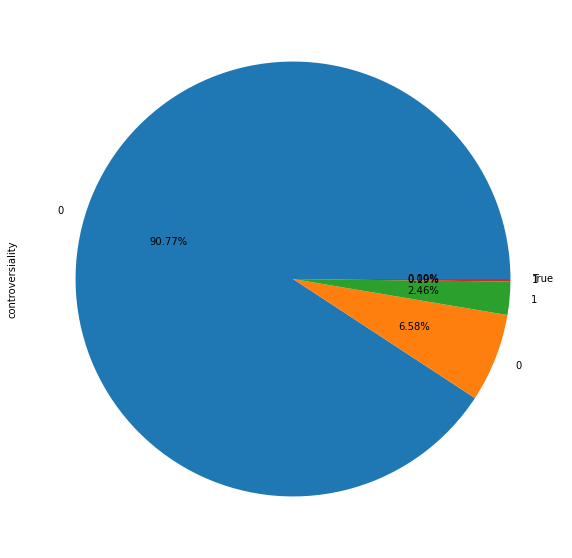

In [9]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["controversiality"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["controversiality"].value_counts())

In [10]:
# Werte '0' in 0 umwandeln
df['controversiality'] = df['controversiality'].replace(0,'0')

# Werte '1' in 1 umwandeln
df['controversiality'] = df['controversiality'].replace(1,'1')
df['controversiality'] = df['controversiality'].replace("True",'1')

In [11]:
df["controversiality"].unique()

array(['0', '1', nan], dtype=object)

In [12]:
# Annahme: Sie haben bereits Ihren DataFrame df erstellt oder eingelesen

# Entferne alle Zeilen, in denen NaN-Werte in der Spalte "controversiality" vorkommen
df = df.dropna(subset=['controversiality'])

# Jetzt enthält 'df' den DataFrame ohne die Zeilen, in denen NaN-Werte in "controversiality" vorkommen

In [13]:
df["controversiality"].unique()

array(['0', '1'], dtype=object)

0    707364
1     19253
Name: controversiality, dtype: int64


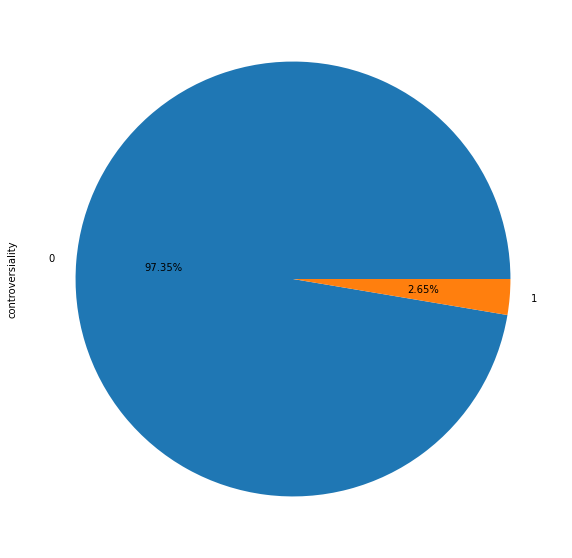

In [14]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["controversiality"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["controversiality"].value_counts())

In [15]:
df[df['controversiality'].isna()]

,all_awardings,archived,associated_award,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_template_id,author_flair_text,author_flair_text_color,...,total_awards_received,treatment_tags,unrepliable_reason,author_flair_richtext,author_flair_type,author_fullname,author_patreon_flair,author_premium,author_cakeday,editable


# Stickied

False          617099
True            60369
False           44840
True             4306
t2_tkpn3bj0         2
t2_8c3uojsx         1
Name: stickied, dtype: int64


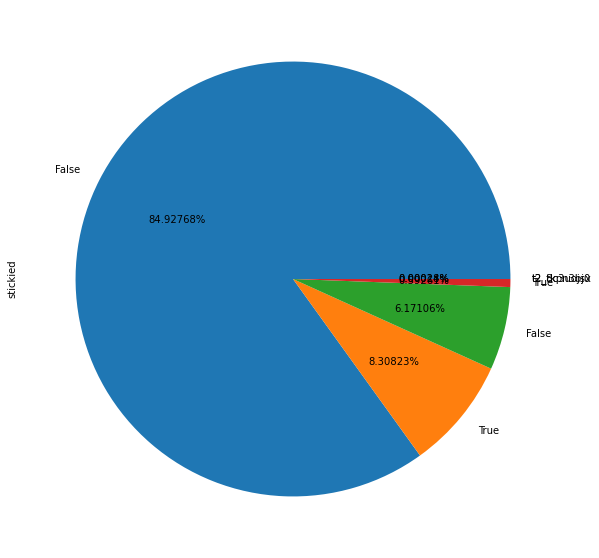

In [16]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["stickied"].value_counts().plot(kind='pie', autopct='%1.5f%%')
print(df["stickied"].value_counts())

In [17]:
df["stickied"].unique()

array([False, True, 'True', 'False', 't2_tkpn3bj0', 't2_8c3uojsx'],
      dtype=object)

In [18]:
df['stickied'] = df['stickied'].replace(False, "0")
df['stickied'] = df['stickied'].replace(True, "1")
df['stickied'] = df['stickied'].replace("False", "0")
df['stickied'] = df['stickied'].replace("True", "1")

In [19]:
# Annahme: Sie haben bereits Ihren DataFrame df erstellt oder eingelesen

# Extrahiere alle Zeilen, in denen die Spalte "stickied" die angegebenen Werte hat
selected_rows = df[df['stickied'].isin(['t2_tkpn3bj0', 't2_8c3uojsx'])]

# Jetzt enthält 'selected_rows' alle Zeilen, in denen die Spalte "stickied" die angegebenen Werte hat
selected_rows[["body","created_utc"]]

,body,created_utc
"If you are a staunch atheist it will be difficult for you to take seriously a person who believes in god and goes to church every week to pray, specially if you have to date her/him. Same here",0,t3_yr4nih
I'm pretty sure there's a lot of manipulation from her mother behind his excuses. Dealing with guilt is very difficult and he is 24. He should try to go to therapy so as not to fall into the manipulations of the mother,0,t1_iw15uth
"Yes, in my eyes its rape. If u can't consent with ur right mind and u were under the affection of drugs its not consent. But since you ate the drug out of free it is different in terms of the law so it is ur word against his. And I believe in court it would be dropped... Tbh I would still report and keep miles of distance between u and him. He is definitely not a friend or any kind of person to trust when he is using ur defenseless sate like that. I feel very bad for ur Situation.",0,t3_z3ct6z


In [20]:
# Annahme: Sie haben bereits Ihren DataFrame df erstellt oder eingelesen

# Identifiziere die Zeilen, in denen die Spalte "stickied" die angegebenen Werte hat
rows_to_remove = df[df['stickied'].isin(["t2_tkpn3bj0", "t2_8c3uojsx"])]

# Lösche die ausgewählten Zeilen aus dem DataFrame df
df = df.drop(rows_to_remove.index)

# Jetzt enthält 'df' den DataFrame ohne die Zeilen, in denen die Spalte "stickied" die angegebenen Werte hat

In [21]:
df["stickied"].unique()

array(['0', '1'], dtype=object)

0    661939
1     64675
Name: stickied, dtype: int64


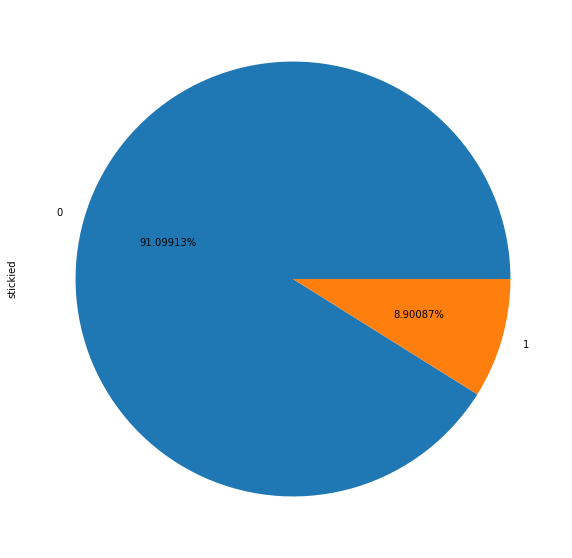

In [22]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["stickied"].value_counts().plot(kind='pie', autopct='%1.5f%%')
print(df["stickied"].value_counts())

# Link_id

t3_ywvyut    1225
t3_yu7k2s    1178
t3_yk2hfs     869
t3_z7tfwz     859
t3_z0vt0c     847
             ... 
t3_yy862x       1
t3_yy85v7       1
t3_yy846m       1
t3_w4p808       1
t3_z97uv3       1
Name: link_id, Length: 68143, dtype: int64


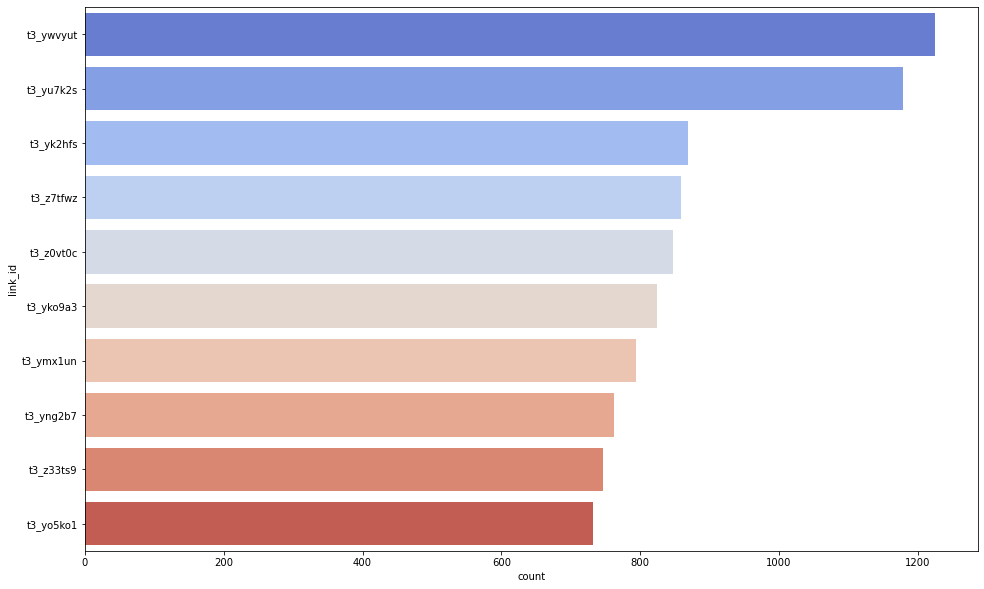

In [23]:
fig = plt.figure(figsize=(16,10))
sns.countplot(y="link_id", data=df, palette="coolwarm",
              order=df.link_id.value_counts().iloc[:10].index)
print(df["link_id"].value_counts())

In [24]:
df[df['link_id'].isna()]

,all_awardings,archived,associated_award,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_template_id,author_flair_text,author_flair_text_color,...,total_awards_received,treatment_tags,unrepliable_reason,author_flair_richtext,author_flair_type,author_fullname,author_patreon_flair,author_premium,author_cakeday,editable


# Subreddit_id

t5_2r0cn    726614
Name: subreddit_id, dtype: int64


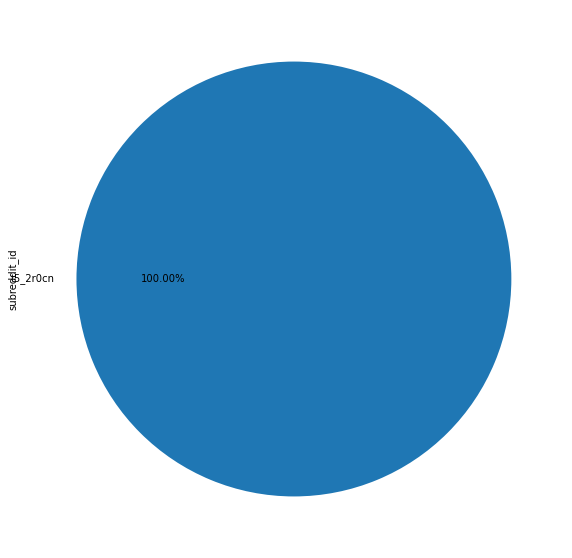

In [25]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["subreddit_id"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["subreddit_id"].value_counts()) 

In [26]:
df[df['subreddit_id'].isna()]

,all_awardings,archived,associated_award,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_template_id,author_flair_text,author_flair_text_color,...,total_awards_received,treatment_tags,unrepliable_reason,author_flair_richtext,author_flair_type,author_fullname,author_patreon_flair,author_premium,author_cakeday,editable


# Author

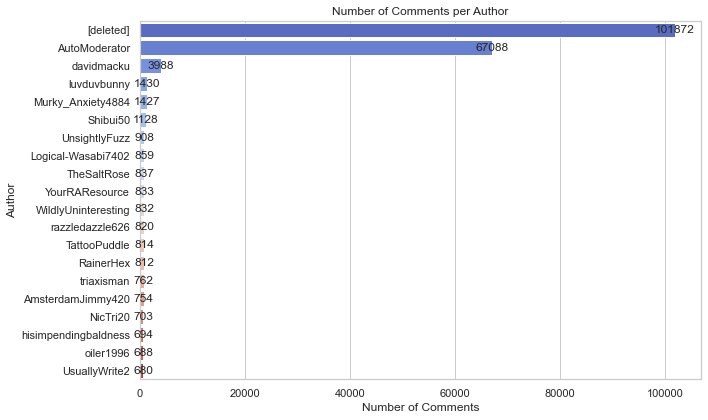

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: Du hast bereits comments_new DataFrame mit einer "author" Spalte

# Top 5 Autoren nach Anzahl der Kommentare auswählen
top_authors = df['author'].value_counts().iloc[:20].index

# Sub-Datenframe nur mit den Top-Autoren erstellen
top_comments = df[df['author'].isin(top_authors)]

# Countplot erstellen
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
plot = sns.countplot(y="author", data=top_comments, palette="coolwarm", order=top_authors)

# Anzahl der Kommentare über den Balken anzeigen
for p in plot.patches:
    plot.annotate(format(p.get_width(), '.0f'),
                  (p.get_width() + 10, p.get_y() + p.get_height() / 2),
                  ha = 'center', va = 'center')

plt.xlabel("Number of Comments")
plt.ylabel("Author")
plt.title("Number of Comments per Author")

# Achsenbeschriftungen nicht abschneiden
plt.tight_layout()
#automoderator löschen

In [28]:
 df[df['author'].str.contains('AutoModerator')]

,all_awardings,archived,associated_award,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_template_id,author_flair_text,author_flair_text_color,...,total_awards_received,treatment_tags,unrepliable_reason,author_flair_richtext,author_flair_type,author_fullname,author_patreon_flair,author_premium,author_cakeday,editable
1,[],False,NaN,AutoModerator,1.325741e+09,NaN,NaN,NaN,NaN,NaN,...,0.0,[],NaN,[],text,t2_6l4z3,False,True,NaN,NaN
5,[],False,NaN,AutoModerator,1.325741e+09,NaN,NaN,NaN,NaN,NaN,...,0.0,[],NaN,[],text,t2_6l4z3,False,True,NaN,NaN
11,[],False,NaN,AutoModerator,1.325741e+09,NaN,NaN,NaN,NaN,NaN,...,0.0,[],NaN,[],text,t2_6l4z3,False,True,NaN,NaN
14,[],False,NaN,AutoModerator,1.325741e+09,NaN,NaN,NaN,NaN,NaN,...,0.0,[],NaN,[],text,t2_6l4z3,False,True,NaN,NaN
24,[],False,NaN,AutoModerator,1.325741e+09,NaN,NaN,NaN,NaN,NaN,...,0.0,[],NaN,[],text,t2_6l4z3,False,True,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726560,[],False,NaN,AutoModerator,1.325741e+09,NaN,NaN,NaN,NaN,NaN,...,0.0,[],NaN,[],text,t2_6l4z3,False,True,NaN,NaN
726573,[],False,NaN,AutoModerator,1.325741e+09,NaN,NaN,NaN,NaN,NaN,...,0.0,[],NaN,[],text,t2_6l4z3,False,True,NaN,NaN
726591,[],False,NaN,AutoModerator,1.325741e+09,NaN,NaN,NaN,NaN,NaN,...,0.0,[],NaN,[],text,t2_6l4z3,False,True,NaN,NaN
726606,[],False,NaN,AutoModerator,1.325741e+09,NaN,NaN,NaN,NaN,NaN,...,0.0,[],NaN,[],text,t2_6l4z3,False,True,NaN,NaN


In [29]:
df = df[df['author'] != 'AutoModerator']

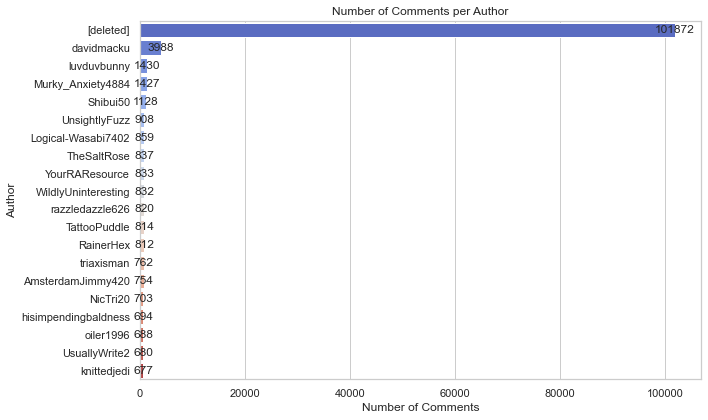

In [30]:
# Top 5 Autoren nach Anzahl der Kommentare auswählen
top_authors = df['author'].value_counts().iloc[:20].index

# Sub-Datenframe nur mit den Top-Autoren erstellen
top_comments = df[df['author'].isin(top_authors)]

# Countplot erstellen
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
plot = sns.countplot(y="author", data=top_comments, palette="coolwarm", order=top_authors)

# Anzahl der Kommentare über den Balken anzeigen
for p in plot.patches:
    plot.annotate(format(p.get_width(), '.0f'),
                  (p.get_width() + 10, p.get_y() + p.get_height() / 2),
                  ha = 'center', va = 'center')

plt.xlabel("Number of Comments")
plt.ylabel("Author")
plt.title("Number of Comments per Author")

# Achsenbeschriftungen nicht abschneiden
plt.tight_layout()
#automoderator löschen

# Author flair text

In [31]:
df['author_flair_text'].fillna('0', inplace=True)

0                            638260
Late 20s Female                2846
Early 30s Female               2708
Early 30s Male                 2266
Late 30s Male                  2161
Early 20s Female               1843
40s Female                     1275
Late 20s Male                  1149
40s Male                       1041
Late 30s Female                 887
50s Male                        702
Early 20s Male                  660
Early 30s                       581
Late 20s                        504
50s Female                      480
60+ Male                        469
Early 20s                       381
Verified Crisis Counselor       302
Teens Female                    264
Late 30s                        177
calls out bots                  119
Teens Male                      116
NB                               85
Teens                            74
50s                              57
40s                              28
60+                              19
MtF trans                   

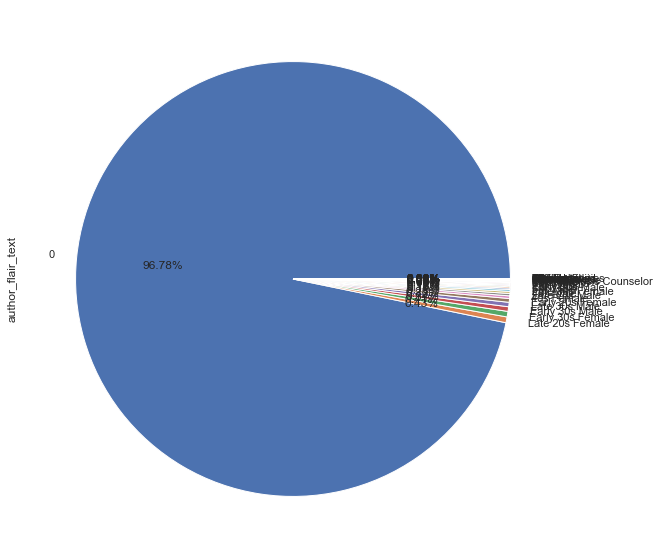

In [32]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["author_flair_text"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["author_flair_text"].value_counts()) 

# Subreddit

relationship_advice    659526
Name: subreddit, dtype: int64


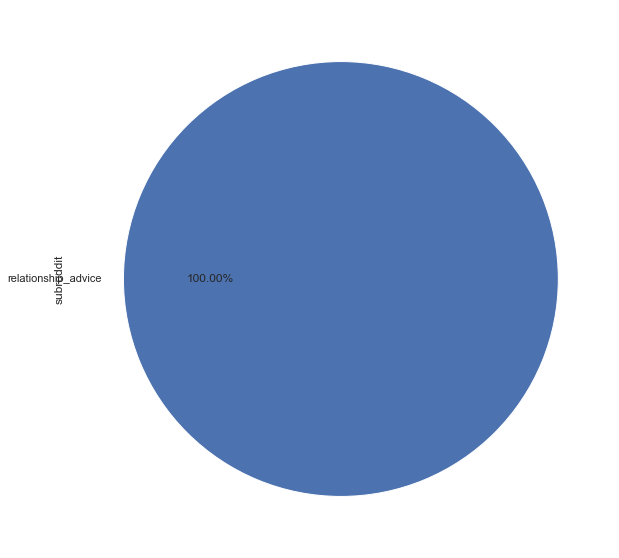

In [33]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["subreddit"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["subreddit"].value_counts())

In [34]:
df[df['subreddit'].isna()]

,all_awardings,archived,associated_award,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_template_id,author_flair_text,author_flair_text_color,...,total_awards_received,treatment_tags,unrepliable_reason,author_flair_richtext,author_flair_type,author_fullname,author_patreon_flair,author_premium,author_cakeday,editable


# Create_utc

In [35]:
df['created_utc'] = pd.to_datetime(df['created_utc'], unit='s')

In [36]:
df['created_utc']

0        2022-11-01 00:00:04
2        2022-11-01 00:00:10
3        2022-11-01 00:00:12
4        2022-11-01 00:00:15
6        2022-11-01 00:00:24
                 ...        
726611   2022-11-30 23:59:55
726612   2022-11-30 23:59:56
726614   2022-11-30 23:59:58
726615   2022-11-30 23:59:58
726616   2022-11-30 23:59:58
Name: created_utc, Length: 659526, dtype: datetime64[ns]

In [37]:
df[df['created_utc'].isna()]

,all_awardings,archived,associated_award,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_template_id,author_flair_text,author_flair_text_color,...,total_awards_received,treatment_tags,unrepliable_reason,author_flair_richtext,author_flair_type,author_fullname,author_patreon_flair,author_premium,author_cakeday,editable


# Hours

Text(0, 0.5, 'Anzahl der Kommentare')

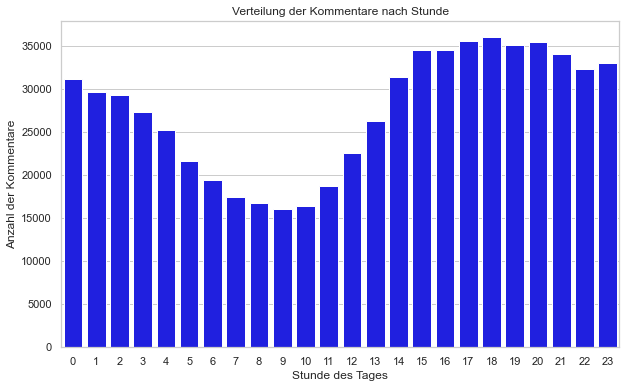

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: Du hast bereits den DataFrame "comments_new" geladen

# Extrahiere die Stunden aus der Spalte "created_utc"
df['created_hour'] = pd.to_datetime(df['created_utc'], unit='s').dt.hour

# Erstelle das Countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='created_hour', color='blue')

plt.title('Verteilung der Kommentare nach Stunde')
plt.xlabel('Stunde des Tages')
plt.ylabel('Anzahl der Kommentare')

# Days

Text(0, 0.5, 'Anzahl der Kommentare')

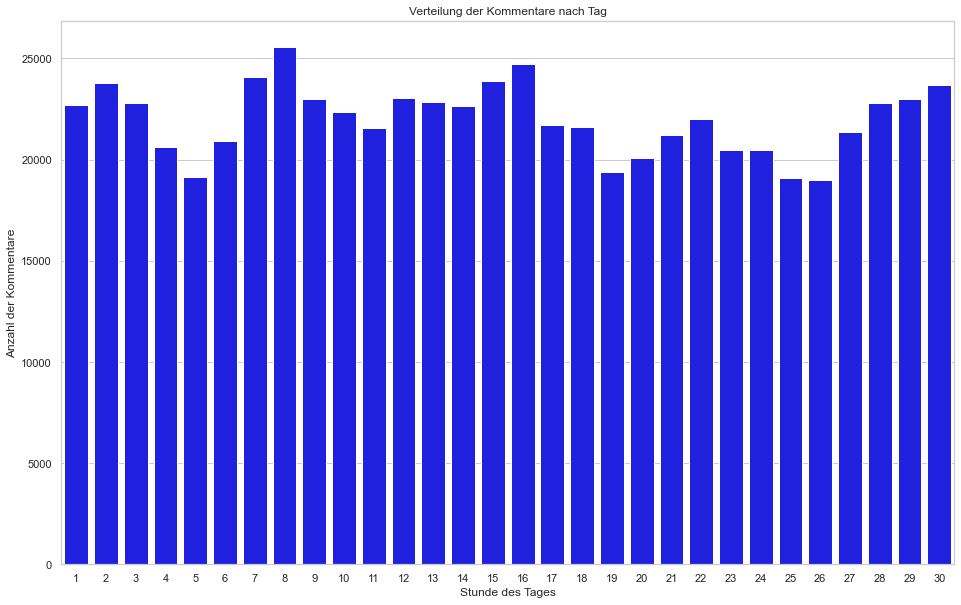

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: Du hast bereits den DataFrame "comments_new" geladen

# Extrahiere die Stunden aus der Spalte "created_utc"
df['created_day'] = pd.to_datetime(df['created_utc'], unit='s').dt.day

# Erstelle das Countplot
fig = plt.figure(figsize=(16,10))
sns.countplot(data=df, x='created_day', color='blue')

plt.title('Verteilung der Kommentare nach Tag')
plt.xlabel('Stunde des Tages')
plt.ylabel('Anzahl der Kommentare')

In [40]:
df['created_year'] = pd.to_datetime(df['created_utc'], unit='s').dt.year

In [41]:
df['created_year'].unique()

array([2022])

# Gilded

0.0    659379
1.0       138
2.0         7
3.0         2
Name: gilded, dtype: int64


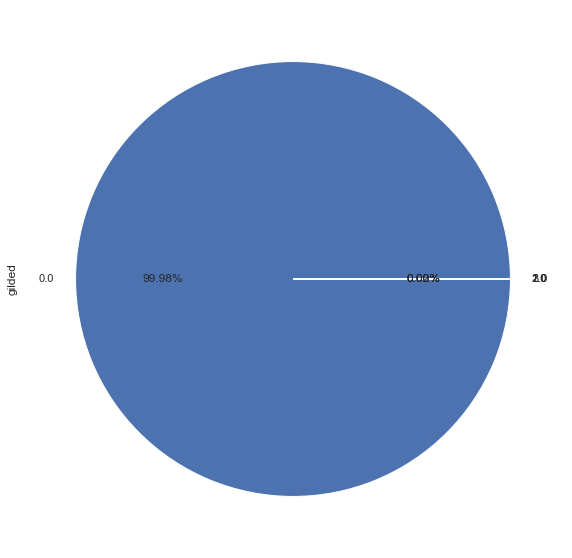

In [42]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["gilded"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["gilded"].value_counts())

In [43]:
df["gilded"] = df["gilded"].replace(0,"0")
df["gilded"] = df["gilded"].replace(1, "1")
df["gilded"] = df["gilded"].replace(2, "2")
df["gilded"] = df["gilded"].replace(3, "3")

0    659379
1       138
2         7
3         2
Name: gilded, dtype: int64


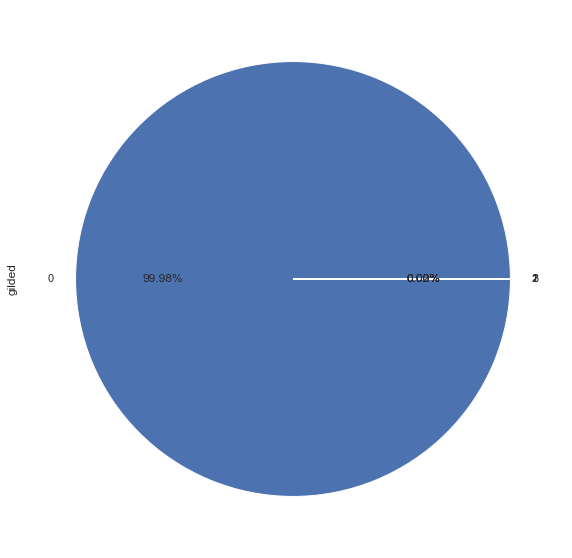

In [44]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["gilded"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["gilded"].value_counts())

In [45]:
df["gilded"].unique()

array(['0', '1', '2', '3'], dtype=object)

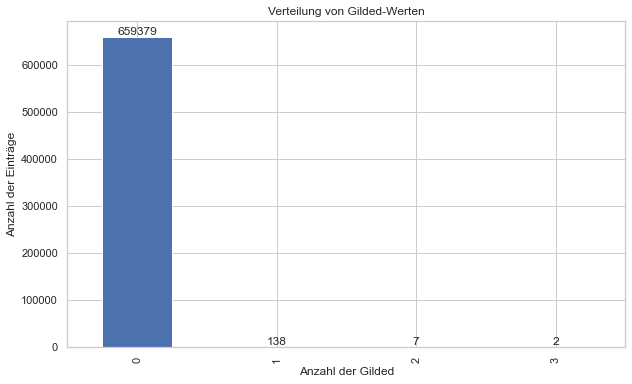

In [46]:
fig = plt.figure(figsize=(10, 6))
ax = df["gilded"].value_counts().plot(kind='bar')

# Optional: Beschriftungen und Titel hinzufügen
ax.set_xlabel('Anzahl der Gilded')
ax.set_ylabel('Anzahl der Einträge')
ax.set_title('Verteilung von Gilded-Werten')

# Anzahl der Werte über den Balken anzeigen
for i, v in enumerate(df["gilded"].value_counts()):
    ax.text(i, v, str(v), ha='center', va='bottom')

# Distinguished

In [47]:
df['distinguished'].fillna('0', inplace=True)

0            658621
moderator       905
Name: distinguished, dtype: int64


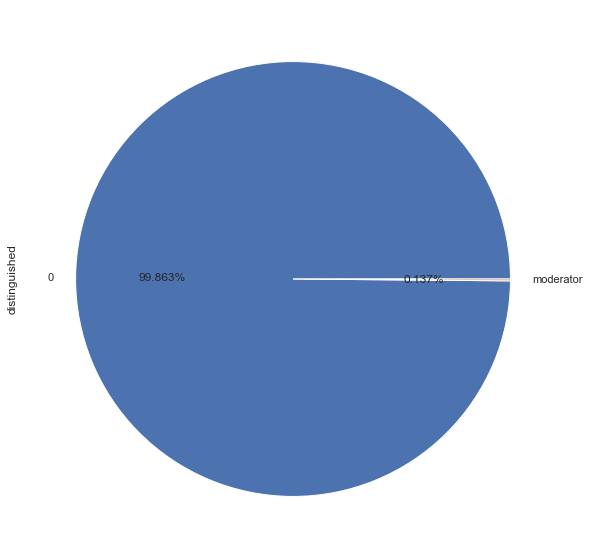

In [48]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["distinguished"].value_counts().plot(kind='pie', autopct='%1.3f%%')
print(df["distinguished"].value_counts())

In [49]:
df["distinguished"].unique()

array(['0', 'moderator'], dtype=object)

In [50]:
 df[df['distinguished'].str.contains('moderator')]

,all_awardings,archived,associated_award,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_template_id,author_flair_text,author_flair_text_color,...,author_flair_richtext,author_flair_type,author_fullname,author_patreon_flair,author_premium,author_cakeday,editable,created_hour,created_day,created_year
722,[],False,NaN,R_Amods,1.568494e+09,NaN,NaN,NaN,0,NaN,...,[],text,t2_4l7jlp7a,False,False,NaN,NaN,0,1,2022
2767,[],False,NaN,R_Amods,1.568494e+09,NaN,NaN,NaN,0,NaN,...,[],text,t2_4l7jlp7a,False,False,NaN,NaN,2,1,2022
3098,[],False,NaN,R_Amods,1.568494e+09,NaN,NaN,NaN,0,NaN,...,[],text,t2_4l7jlp7a,False,False,NaN,NaN,3,1,2022
3265,[],False,NaN,R_Amods,1.568494e+09,NaN,NaN,NaN,0,NaN,...,[],text,t2_4l7jlp7a,False,False,NaN,NaN,3,1,2022
4257,[],False,NaN,R_Amods,1.568494e+09,NaN,NaN,NaN,0,NaN,...,[],text,t2_4l7jlp7a,False,False,NaN,NaN,4,1,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
721459,[],False,NaN,R_Amods,1.568494e+09,NaN,NaN,NaN,0,NaN,...,[],text,t2_4l7jlp7a,False,False,NaN,NaN,20,30,2022
722632,[],False,NaN,R_Amods,1.568494e+09,NaN,NaN,NaN,0,NaN,...,[],text,t2_4l7jlp7a,False,False,NaN,NaN,21,30,2022
723268,[],False,NaN,relationship_advice-ModTeam,1.661376e+09,NaN,NaN,NaN,0,NaN,...,[],text,t2_rvfna3go,False,False,NaN,NaN,21,30,2022
723322,[],False,NaN,R_Amods,1.568494e+09,NaN,NaN,NaN,0,NaN,...,[],text,t2_4l7jlp7a,False,False,NaN,NaN,21,30,2022


In [96]:
 df[df['distinguished'].str.contains('moderator')]["body"].iloc[900:906]

721459    This post has reached one of our comment/karma...
722632    This post has reached one of our comment/karma...
723268    Hey, /u/Cheese_Defender3. Unfortunately your c...
723322    This post has reached one of our comment/karma...
723980    This post has reached one of our comment/karma...
Name: body, dtype: object

In [97]:

behalten_indexe = [121833,334781]

# Lösche die Zeilen, die 'distinguished' den Wert 'moderator' haben, aber nicht in der behalten_indexe-Liste enthalten sind
df = df[~((df['distinguished'] == 'moderator') & (~df.index.isin(behalten_indexe)))]

In [98]:
 df[df['distinguished'].str.contains('moderator')]["body"]

121833    The fuck is wrong with you\n\n&gt; Comment Rul...
334781    It's deliberate. The question and the advice d...
Name: body, dtype: object

0            658621
moderator         2
Name: distinguished, dtype: int64


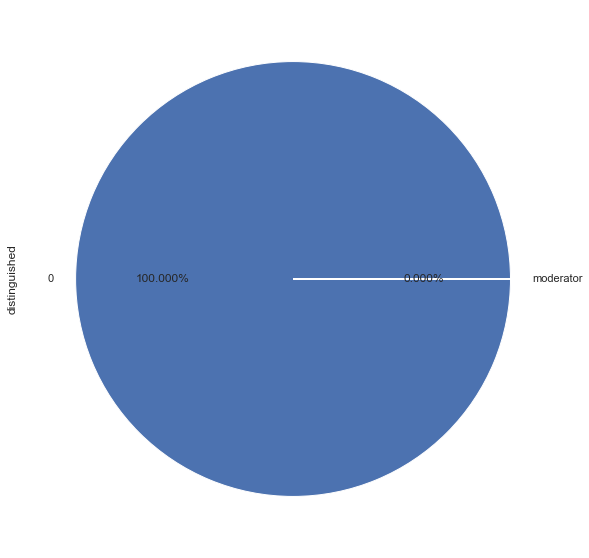

In [99]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["distinguished"].value_counts().plot(kind='pie', autopct='%1.3f%%')
print(df["distinguished"].value_counts())

# Edited

In [100]:
df["edited"].unique()

array(['False', '1667261335.0', '1667261436.0', ..., '1669852857.0',
       '1669853343.0', '1669853945.0'], dtype=object)

In [101]:
# Alle Zahlenwerte in der Spalte "edited" durch "1" ersetzen
df['edited'] = df['edited'].replace(to_replace=r'\d', value='1', regex=True)
df['edited'] = df['edited'].replace('1111111111.1', "1")
df['edited'] = df['edited'].replace('False', "0")

In [102]:
df["edited"].unique()

array(['0', '1'], dtype=object)

0    642042
1     16581
Name: edited, dtype: int64


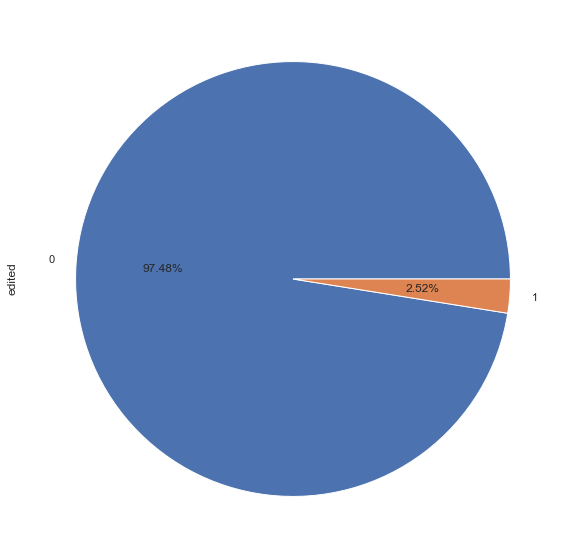

In [103]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df['edited'].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df['edited'].value_counts())

In [104]:
df[df['edited'].isna()]

,all_awardings,archived,associated_award,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_template_id,author_flair_text,author_flair_text_color,...,author_flair_richtext,author_flair_type,author_fullname,author_patreon_flair,author_premium,author_cakeday,editable,created_hour,created_day,created_year


# Score

In [105]:
df["score"].value_counts()

1.0       281605
2.0        99001
3.0        46806
0.0        31439
4.0        19758
           ...  
1415.0         1
924.0          1
2572.0         1
1152.0         1
1122.0         1
Name: score, Length: 2083, dtype: int64

In [106]:
df['score'] = df["score"].astype(int)

In [107]:
df["score"].mean()

11.47551178747174

In [108]:
df.describe()

,associated_award,author_created_utc,author_flair_background_color,score,top_awarded_type,total_awards_received,unrepliable_reason,created_hour,created_day,created_year
count,0.0,5.552590e+05,0.0,658623.000000,0.0,658623.000000,0.0,658623.000000,658623.000000,658623.0
mean,NaN,1.590054e+09,NaN,11.475512,NaN,0.004218,NaN,12.428365,15.331185,2022.0
std,NaN,7.872497e+07,NaN,89.120393,NaN,0.123197,NaN,7.238793,8.666224,0.0
min,NaN,1.124597e+09,NaN,-1596.000000,NaN,0.000000,NaN,0.000000,1.000000,2022.0
25%,NaN,1.564010e+09,NaN,1.000000,NaN,0.000000,NaN,6.000000,8.000000,2022.0
50%,NaN,1.609277e+09,NaN,1.000000,NaN,0.000000,NaN,14.000000,15.000000,2022.0
75%,NaN,1.647659e+09,NaN,3.000000,NaN,0.000000,NaN,19.000000,23.000000,2022.0
max,NaN,1.669849e+09,NaN,7781.000000,NaN,34.000000,NaN,23.000000,30.000000,2022.0


In [109]:
df.isnull().sum() 

all_awardings                           0
archived                                0
associated_award                   658623
author                                  0
author_created_utc                 103364
author_flair_background_color      658623
author_flair_css_class             658610
author_flair_template_id           637799
author_flair_text                       0
author_flair_text_color            535488
body                                    1
can_gild                                0
collapsed                               0
collapsed_because_crowd_control    658623
collapsed_reason                   642499
collapsed_reason_code              552504
comment_type                       658623
controversiality                        0
created_utc                             0
distinguished                           0
edited                                  0
gilded                                  0
gildings                                0
id                                

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 658623 entries, 0 to 726616
Data columns (total 54 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   all_awardings                    658623 non-null  object        
 1   archived                         658623 non-null  bool          
 2   associated_award                 0 non-null       float64       
 3   author                           658623 non-null  object        
 4   author_created_utc               555259 non-null  float64       
 5   author_flair_background_color    0 non-null       float64       
 6   author_flair_css_class           13 non-null      object        
 7   author_flair_template_id         20824 non-null   object        
 8   author_flair_text                658623 non-null  object        
 9   author_flair_text_color          123135 non-null  object        
 10  body                             658622 non-null 

# Two Features Analyses

# Score vs hours

<AxesSubplot:xlabel='created_hour', ylabel='score'>

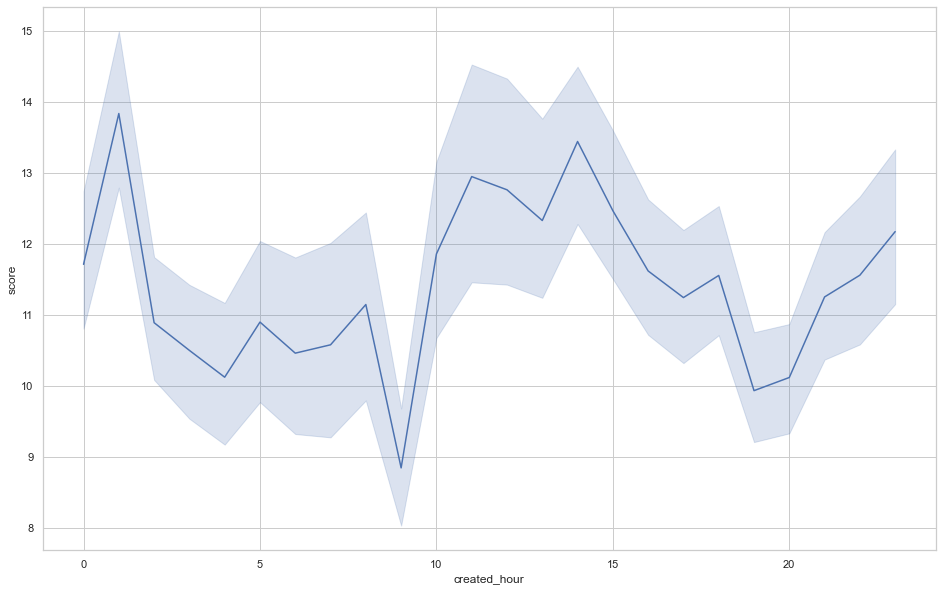

In [111]:
fig = plt.figure(figsize=(16,10))
sns.lineplot(data=df, x="created_hour", y="score")

# Days vs score

<AxesSubplot:xlabel='created_day', ylabel='score'>

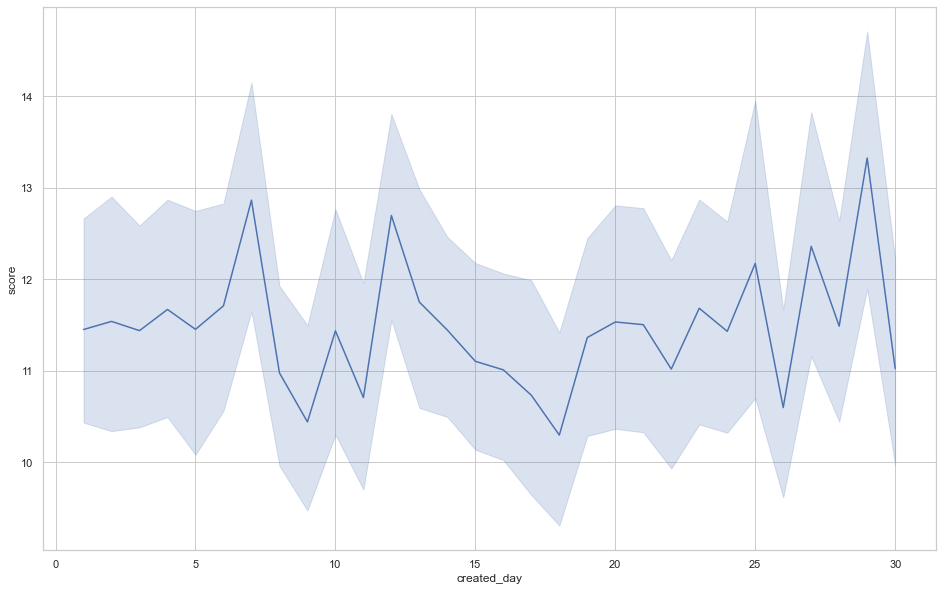

In [112]:
fig = plt.figure(figsize=(16,10))
sns.lineplot(data=df, x="created_day", y="score")

# Which Author have the most scores

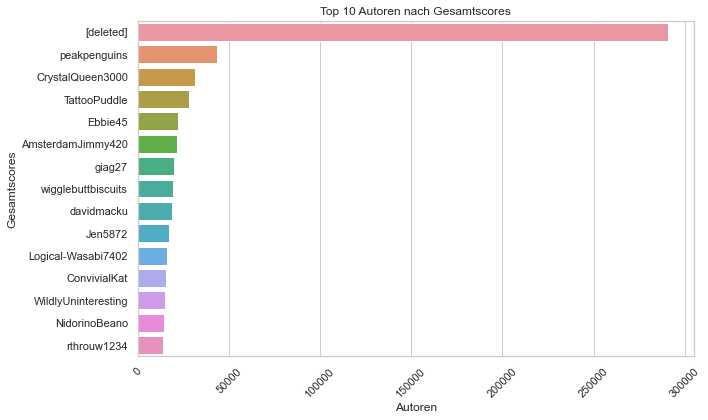

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: merged_df ist dein DataFrame mit den entsprechenden Spalten

# Autoren nach Gesamtscores gruppieren
author_scores = df.groupby('author')['score'].sum()

# Autoren nach Gesamtscores absteigend sortieren und die Top 10 auswählen
top_authors = author_scores.sort_values(ascending=False).head(15)

# Plot mit Seaborn erstellen
plt.figure(figsize=(10, 6))
sns.barplot(y=top_authors.index, x=top_authors.values)
plt.title('Top 10 Autoren nach Gesamtscores')
plt.xlabel('Autoren')
plt.ylabel('Gesamtscores')
plt.xticks(rotation=45)
plt.tight_layout()

# Ohne Deleted

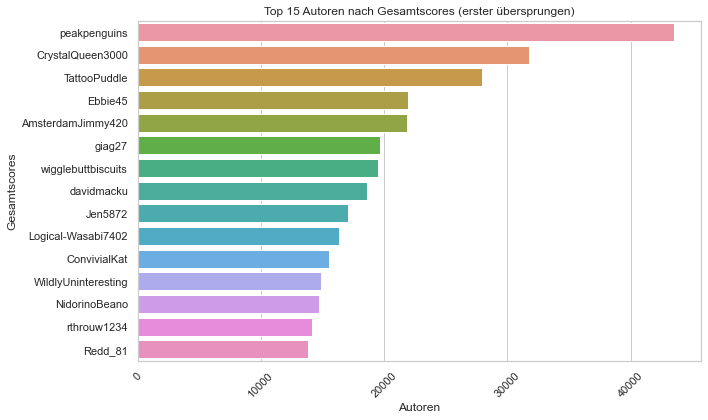

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: merged_df ist dein DataFrame mit den entsprechenden Spalten
# Stellen Sie sicher, dass Sie denselben DataFrame-Namen verwenden

# Autoren nach Gesamtscores gruppieren
author_scores = df.groupby('author')['score'].sum()

# Autoren nach Gesamtscores absteigend sortieren
sorted_authors = author_scores.sort_values(ascending=False)

# Den ersten Autor aus der sortierten Liste entfernen
sorted_authors = sorted_authors.iloc[1:]

# Die Top 15 Autoren auswählen
top_authors = sorted_authors.head(15)

# Plot mit Seaborn erstellen
plt.figure(figsize=(10, 6))
sns.barplot(y=top_authors.index, x=top_authors.values)
plt.title('Top 15 Autoren nach Gesamtscores (erster übersprungen)')
plt.xlabel('Autoren')
plt.ylabel('Gesamtscores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Column removing

In [115]:
df=df.drop(["author_flair_css_class", "subreddit","retrieved_on","subreddit_id","is_submitter","subreddit_type","author_cakeday","permalink"], axis = 1)

In [116]:
df=df.drop(["author_flair_background_color","collapsed","collapsed_reason","send_replies"], axis = 1)

In [117]:
df=df.drop(["author_created_utc","author_flair_template_id","author_flair_text_color","author_fullname","can_gild","gildings","no_follow","subreddit_name_prefixed","author_flair_richtext","author_flair_type","author_patreon_flair"], axis = 1)

In [118]:
df=df.drop(["all_awardings","associated_award","author_premium","collapsed_because_crowd_control","locked","total_awards_received"], axis = 1)

In [119]:
df=df.drop(["archived","collapsed_reason_code","comment_type","score_hidden","top_awarded_type","treatment_tags","unrepliable_reason","editable"], axis = 1)

In [120]:
df=df.drop(["name"], axis = 1)

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 658623 entries, 0 to 726616
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   author             658623 non-null  object        
 1   author_flair_text  658623 non-null  object        
 2   body               658622 non-null  object        
 3   controversiality   658623 non-null  object        
 4   created_utc        658623 non-null  datetime64[ns]
 5   distinguished      658623 non-null  object        
 6   edited             658623 non-null  object        
 7   gilded             658623 non-null  object        
 8   id                 658623 non-null  object        
 9   link_id            658623 non-null  object        
 10  parent_id          658623 non-null  object        
 11  score              658623 non-null  int64         
 12  stickied           658623 non-null  object        
 13  created_hour       658623 non-null  int64        

In [122]:
df.isnull().sum() 

author               0
author_flair_text    0
body                 1
controversiality     0
created_utc          0
distinguished        0
edited               0
gilded               0
id                   0
link_id              0
parent_id            0
score                0
stickied             0
created_hour         0
created_day          0
created_year         0
dtype: int64

# Row Deleting

In [123]:
df[pd.isna(df['body'])]

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
515614,yowen2000,0,NaN,0,2022-11-22 00:43:44,0,0,0,ixanf2o,t3_z1fiep,t3_z1fiep,1,0,0,22,2022


In [124]:
df = df.dropna(subset=['body'])

In [125]:
df.isnull().sum() 

author               0
author_flair_text    0
body                 0
controversiality     0
created_utc          0
distinguished        0
edited               0
gilded               0
id                   0
link_id              0
parent_id            0
score                0
stickied             0
created_hour         0
created_day          0
created_year         0
dtype: int64

# Body Analyses and Pre processing

[removed]                                                                                                                                                                                                                                              61320
[deleted]                                                                                                                                                                                                                                              28676
UpdateMe!                                                                                                                                                                                                                                                429
Updateme!                                                                                                                                                                                                                                        

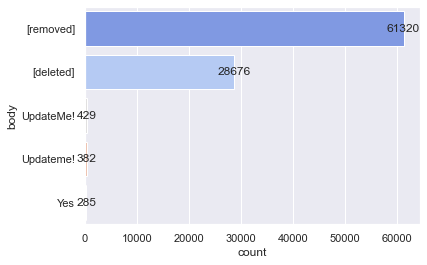

In [126]:
# Countplot für die "body"-Spalte mit den Top 3 Werten erstellen
sns.set(style="darkgrid")
ax = sns.countplot(y="body", data=df, palette="coolwarm",
              order=df.body.value_counts().iloc[:5].index)

# Counts in das Plot-Diagramm einfügen
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width() + 1, p.get_y() + p.get_height() / 2), ha='center', va='center')

# Counts für die Werte in der "body"-Spalte ausgeben
print(df["body"].value_counts())

# Haben Removed comments mehr likes

In [127]:
filtered_df=df[df['body'] == '[removed]']

In [128]:
filtered_df.describe()

,score,created_hour,created_day,created_year
count,61320.000000,61320.000000,61320.000000,61320.0
mean,1.211888,12.327087,19.143673,2022.0
std,14.881388,7.287592,7.570012,0.0
min,-438.000000,0.000000,1.000000,2022.0
25%,1.000000,5.000000,15.000000,2022.0
50%,1.000000,14.000000,20.000000,2022.0
75%,1.000000,19.000000,25.000000,2022.0
max,1760.000000,23.000000,30.000000,2022.0


In [129]:
len(filtered_df)

61320

Text(0.5, 1.0, 'Histogramm der Scores')

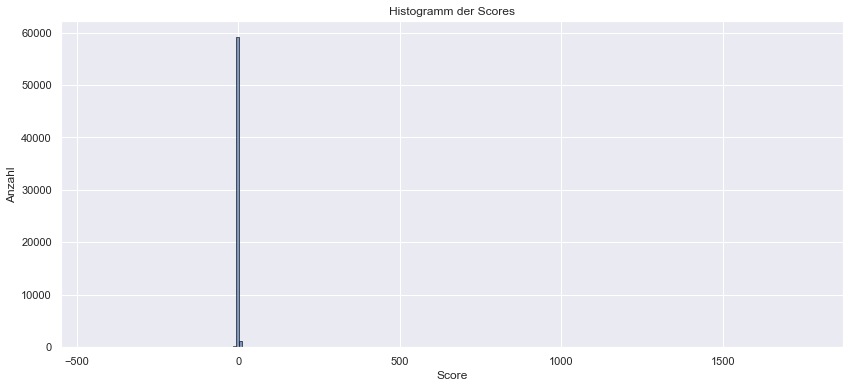

In [130]:
# Countplot für die "score"-Spalte erstellen
plt.figure(figsize=(14, 6))
plt.hist(filtered_df['score'], bins=240, edgecolor='k', alpha=0.7)
plt.xlabel('Score')
plt.ylabel('Anzahl')
plt.title('Histogramm der Scores')

Removed Kommentare löschen

In [131]:
df = df[df['body'] != '[removed]']

[deleted]                                                                                                                                                                                                                                              28676
UpdateMe!                                                                                                                                                                                                                                                429
Updateme!                                                                                                                                                                                                                                                382
Yes                                                                                                                                                                                                                                              

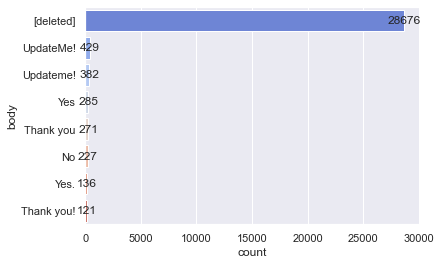

In [132]:
# Countplot für die "body"-Spalte mit den Top 3 Werten erstellen
sns.set(style="darkgrid")
ax = sns.countplot(y="body", data=df, palette="coolwarm",
              order=df.body.value_counts().iloc[:8].index)

# Counts in das Plot-Diagramm einfügen
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width() + 1, p.get_y() + p.get_height() / 2), ha='center', va='center')

# Counts für die Werte in der "body"-Spalte ausgeben
print(df["body"].value_counts())

# Haben deleted comments mehr likes

In [133]:
filtered_df_del=df[df['body'] == '[deleted]']

In [134]:
filtered_df_del

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
134,[deleted],0,[deleted],0,2022-11-01 00:08:14,0,0,0,iukd42b,t3_yiq3tl,t3_yiq3tl,8,0,0,1,2022
221,[deleted],0,[deleted],0,2022-11-01 00:14:42,0,0,0,iukdxe5,t3_yiswbj,t1_iukb93e,1,0,0,1,2022
258,[deleted],0,[deleted],0,2022-11-01 00:16:49,0,0,0,iuke75b,t3_yiq3tl,t3_yiq3tl,1,0,0,1,2022
293,[deleted],0,[deleted],0,2022-11-01 00:19:07,0,0,0,iukehlu,t3_yio8rk,t3_yio8rk,1,0,0,1,2022
305,[deleted],0,[deleted],0,2022-11-01 00:19:54,0,0,0,iukel80,t3_yiq1r7,t1_iujz83n,432,0,0,1,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726369,[deleted],0,[deleted],0,2022-11-30 23:51:47,0,0,0,iyfdlzu,t3_z95b67,t1_iyf8ppv,1,0,23,30,2022
726464,[deleted],0,[deleted],0,2022-11-30 23:54:52,0,0,0,iyfe0e8,t3_z972yc,t1_iyfcptc,1,0,23,30,2022
726470,[deleted],0,[deleted],0,2022-11-30 23:55:02,0,0,0,iyfe17m,t3_z96d8b,t3_z96d8b,2,0,23,30,2022
726487,[deleted],0,[deleted],0,2022-11-30 23:55:36,0,0,0,iyfe3v4,t3_z97mr2,t3_z97mr2,3,0,23,30,2022


In [135]:
filtered_df_del.describe()

,score,created_hour,created_day,created_year
count,28676.000000,28676.000000,28676.000000,28676.0
mean,3.260601,12.619996,14.610964,2022.0
std,44.104350,7.259538,8.572790,0.0
min,-1462.000000,0.000000,1.000000,2022.0
25%,1.000000,6.000000,8.000000,2022.0
50%,1.000000,14.000000,14.000000,2022.0
75%,1.000000,19.000000,22.000000,2022.0
max,3094.000000,23.000000,30.000000,2022.0


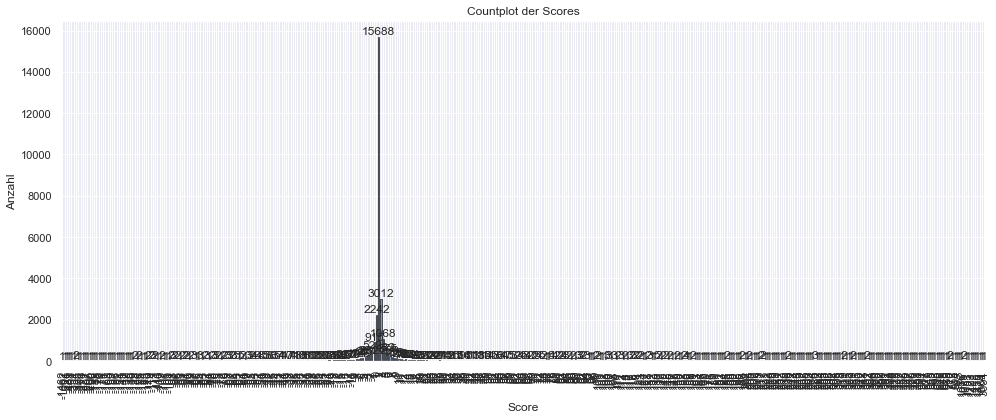

In [136]:
plt.figure(figsize=(14, 6))
counts = filtered_df_del['score'].value_counts().sort_index()
ax = counts.plot(kind='bar', edgecolor='k', alpha=0.7)
plt.xlabel('Score')
plt.ylabel('Anzahl')
plt.title('Countplot der Scores')
plt.tight_layout()
# Counts über den Balken anzeigen
for i, v in enumerate(counts):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

Kommenrare die deleted wurden löschen

In [137]:
df = df[df['body'] != '[deleted]']

UpdateMe!                                                                                                                                                                                                                                              429
Updateme!                                                                                                                                                                                                                                              382
Yes                                                                                                                                                                                                                                                    285
Thank you                                                                                                                                                                                                                                              

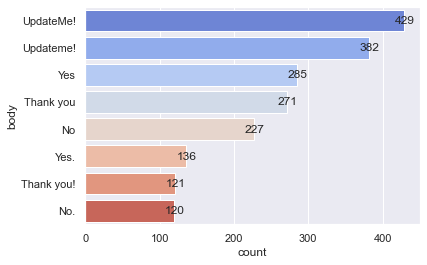

In [138]:
# Countplot für die "body"-Spalte mit den Top 3 Werten erstellen
sns.set(style="darkgrid")
ax = sns.countplot(y="body", data=df, palette="coolwarm",
              order=df.body.value_counts().iloc[:8].index)

# Counts in das Plot-Diagramm einfügen
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width() + 1, p.get_y() + p.get_height() / 2), ha='center', va='center')

# Counts für die Werte in der "body"-Spalte ausgeben
print(df["body"].value_counts())

In [139]:
df[df['body'] == "."]

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
42058,kriscnik,0,.,0,2022-11-02 17:15:00,0,0,0,ius7n1g,t3_yk6l9z,t1_iurlg8u,0,0,17,2,2022
63295,Complete_Solution471,0,.,0,2022-11-03 13:57:49,0,0,0,iuw7uwn,t3_yl2zdw,t3_yl2zdw,1,0,13,3,2022
64297,[deleted],0,.,0,2022-11-03 14:50:58,0,0,0,iuwfja4,t3_yl1q50,t3_yl1q50,1,0,14,3,2022
85673,Total_Eagle_7359,0,.,0,2022-11-04 12:32:52,0,0,0,iv0oeow,t3_ylwj4t,t3_ylwj4t,2,0,12,4,2022
85677,Total_Eagle_7359,0,.,0,2022-11-04 12:33:03,0,0,0,iv0ofhh,t3_ylwh78,t3_ylwh78,1,0,12,4,2022
98721,Significant_Poem1817,0,.,0,2022-11-04 23:48:41,0,0,0,iv3dtrs,t3_ymdxj9,t1_iv3c6dx,1,0,23,4,2022
114904,assburp,0,.,0,2022-11-05 19:35:17,0,1,0,iv6vkuk,t3_ymt6eh,t3_ymt6eh,4,0,19,5,2022
165667,Domilpower,0,.,0,2022-11-07 20:42:15,0,0,0,ivgly2m,t3_yoyopu,t3_yoyopu,1,0,20,7,2022
188892,CheyBru16,0,.,0,2022-11-08 18:01:51,0,0,0,ivkpyfq,t3_ypbvd1,t1_ivj4jt4,1,0,18,8,2022
231816,Tobi755889,0,.,0,2022-11-10 10:43:25,0,0,0,ivsun6w,t3_yr6zsz,t1_ivseo05,0,0,10,10,2022


In [140]:
df = df[df['body'] != '.']

In [141]:
df[df['body'] == "."]

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [142]:
df[df['body'] == "F"]

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
120271,plut0n94,0,F,0,2022-11-06 00:05:48,0,0,0,iv7x33j,t3_yn8o3r,t3_yn8o3r,1,0,0,6,2022
368009,Outrageous_Guide_959,0,F,0,2022-11-15 19:59:09,0,0,0,iwi0mpc,t3_yvzu89,t3_yvzu89,0,0,19,15,2022
490663,giangcsp,0,F,0,2022-11-20 23:37:24,0,0,0,ix5tc74,t3_yzszhv,t3_yzszhv,1,0,23,20,2022
568469,justyouraveragedude1,0,F,0,2022-11-24 07:09:51,0,0,0,ixl6moy,t3_z3aumo,t3_z3aumo,1,0,7,24,2022
608759,lostallmyconnex,0,F,0,2022-11-26 03:28:20,0,0,0,ixt56jl,t3_z4qhkv,t3_z4qhkv,1,0,3,26,2022
669130,justyouraveragedude1,0,F,0,2022-11-28 19:29:27,0,0,0,iy4tlgz,t3_z6ndet,t1_iy4qek5,17,0,19,28,2022
725854,justyouraveragedude1,0,F,0,2022-11-30 23:35:02,0,0,0,iyfbf16,t3_z8mok6,t3_z8mok6,-2,0,23,30,2022


In [143]:
df = df[df['body'] != 'F']

UpdateMe!                                                                                                                                                                                                                                              429
Updateme!                                                                                                                                                                                                                                              382
Yes                                                                                                                                                                                                                                                    285
Thank you                                                                                                                                                                                                                                              

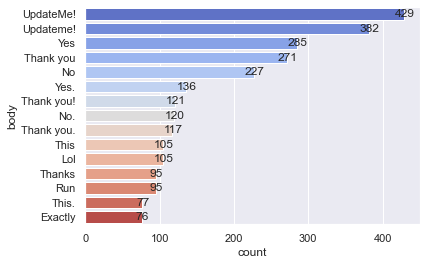

In [145]:
# Countplot für die "body"-Spalte mit den Top 3 Werten erstellen
sns.set(style="darkgrid")
ax = sns.countplot(y="body", data=df, palette="coolwarm",
              order=df.body.value_counts().iloc[:15].index)

# Counts in das Plot-Diagramm einfügen
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width() + 1, p.get_y() + p.get_height() / 2), ha='center', va='center')

# Counts für die Werte in der "body"-Spalte ausgeben
print(df["body"].value_counts())

In [147]:
df = df[~df['body'].str.contains('UpdateMe!')]

In [148]:
df[df['body'].str.contains('UpdateMe!')]

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [149]:

df = df[~df['body'].str.contains('Updateme!')]

Yes                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

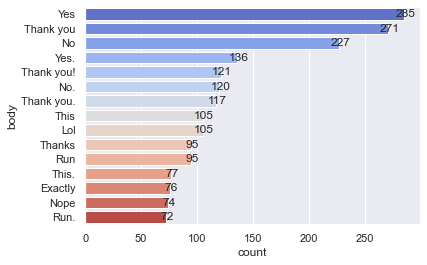

In [150]:
# Countplot für die "body"-Spalte mit den Top 3 Werten erstellen
sns.set(style="darkgrid")
ax = sns.countplot(y="body", data=df, palette="coolwarm",
              order=df.body.value_counts().iloc[:15].index)

# Counts in das Plot-Diagramm einfügen
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width() + 1, p.get_y() + p.get_height() / 2), ha='center', va='center')

# Counts für die Werte in der "body"-Spalte ausgeben
print(df["body"].value_counts())

In [151]:
df[df['body'].str.contains('Remind me!')]

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
57253,gguareschi,0,Remind me! 1 day,0,2022-11-03 05:46:50,0,0,0,iuv1z1j,t3_yk8dl8,t1_iuv0918,0,0,5,3,2022
57443,justanotherburner49,0,Remind me! 1 day,0,2022-11-03 06:01:53,0,0,0,iuv33lu,t3_yk8dl8,t1_iuv1z1j,0,0,6,3,2022
74638,GetOverItCDN,0,Remind me! 14 days,0,2022-11-03 22:45:02,0,0,0,iuycvl3,t3_ylat4t,t3_ylat4t,1,0,22,3,2022
231533,Grinsekatze101,Early 30s Female,Remind me! 30 days,0,2022-11-10 10:22:20,0,0,0,ivst50l,t3_yr6zsz,t1_ivseo05,0,0,10,10,2022
320929,Cats-and-Sunshine,0,Remind me! 2 days,0,2022-11-13 23:08:02,0,0,0,iw9dh33,t3_yu5ew9,t1_iw98aq8,2,0,23,13,2022
562052,Cats-and-Sunshine,0,Remind me! 1 week,0,2022-11-24 00:32:01,0,0,0,ixjzpua,t3_z2nojp,t1_ixinr4q,1,0,0,24,2022
564704,bonisnotmynamme,0,Remind me! 2 days,0,2022-11-24 02:53:57,0,0,0,ixkh87a,t3_z35ou0,t3_z35ou0,2,0,2,24,2022
571822,livjorgenson,0,Remind me! 3 days,0,2022-11-24 11:55:15,0,0,0,ixlr5wr,t3_z2yro8,t3_z2yro8,1,0,11,24,2022
588105,pqa8989,0,Remind me! 1 week,0,2022-11-25 04:04:56,0,0,0,ixp0iwl,t3_z3mmjp,t3_z3mmjp,1,0,4,25,2022
609741,pqa8989,0,Remind me! 3 days,0,2022-11-26 04:36:06,0,0,0,ixtcbgd,t3_z4kbgl,t3_z4kbgl,1,0,4,26,2022


In [152]:
df = df[~df['body'].str.contains('Remind me!')]

In [155]:
df = df[~df['body'].str.contains("!Remind me")]

In [156]:
df = df[~df['body'].str.contains("!remindme")]

In [154]:
df[df['body'].str.contains('Remind me ')]

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
28355,CreepyEmployment8435,0,Thank you you’re very right in this situation....,0,2022-11-02 02:41:16,0,0,0,iupp0l8,t3_yjt1zr,t1_iuposq3,2,0,2,2,2022
39020,Worth_Persimmon_9561,0,Remind me 2 days!,0,2022-11-02 15:05:38,0,0,0,iurnpja,t3_yk5wjg,t3_yk5wjg,1,0,15,2,2022
78951,Fearless_Act_3698,0,!Remind me 2 days,0,2022-11-04 02:40:27,0,0,0,iuz9ovo,t3_yll4a7,t3_yll4a7,1,0,2,4,2022
224444,Status_Welder9824,0,"So she makes none of the income , financialy i...",0,2022-11-10 00:52:49,0,0,0,ivra0xi,t3_yr0ruc,t3_yr0ruc,2,0,0,10,2022
229576,MorRN127,0,Remind me 2 days!,0,2022-11-10 07:22:26,0,0,0,ivsgg3d,t3_yqjps0,t3_yqjps0,1,0,7,10,2022
230566,FlowBeepBeep,0,!Remind me 1 month,0,2022-11-10 08:57:35,0,0,0,ivsnbsc,t3_yr6zsz,t1_ivseo05,18,0,8,10,2022
230705,princessavocado1505,0,!Remind me 1 month,0,2022-11-10 09:07:43,0,0,0,ivso14d,t3_yr6zsz,t1_ivsnbsc,6,0,9,10,2022
231256,Remarkable_Abies_712,0,Remind me 1 month,0,2022-11-10 10:01:23,0,0,0,ivsroel,t3_yr6zsz,t1_ivsq8gf,0,0,10,10,2022
231269,deathmetalproxy,0,!Remind me 1 month,0,2022-11-10 10:02:29,0,0,0,ivsrqyd,t3_yr6zsz,t1_ivseo05,0,0,10,10,2022
231295,deathmetalproxy,0,!Remind me 1 month,0,2022-11-10 10:04:33,0,0,0,ivsrw82,t3_yr6zsz,t1_ivseo05,0,0,10,10,2022


In [157]:
df = df[~df['body'].str.contains('Remind me!')]

In [158]:
df = df[~df['body'].str.contains("!remindme")]

In [159]:
df = df[~df['body'].str.contains("!remind")]

In [160]:
df[df['body'].str.contains("!remind me")]

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [161]:
df = df[~df['body'].str.contains("Remindme! 1 day")]

In [162]:
df = df[~df['body'].str.contains("UpdateMe!")]

In [163]:
df = df[~df['body'].str.contains("remindme! 1 day")]

In [164]:
df[df['body'].str.contains('Remind me ')]

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
28355,CreepyEmployment8435,0,Thank you you’re very right in this situation....,0,2022-11-02 02:41:16,0,0,0,iupp0l8,t3_yjt1zr,t1_iuposq3,2,0,2,2,2022
39020,Worth_Persimmon_9561,0,Remind me 2 days!,0,2022-11-02 15:05:38,0,0,0,iurnpja,t3_yk5wjg,t3_yk5wjg,1,0,15,2,2022
224444,Status_Welder9824,0,"So she makes none of the income , financialy i...",0,2022-11-10 00:52:49,0,0,0,ivra0xi,t3_yr0ruc,t3_yr0ruc,2,0,0,10,2022
229576,MorRN127,0,Remind me 2 days!,0,2022-11-10 07:22:26,0,0,0,ivsgg3d,t3_yqjps0,t3_yqjps0,1,0,7,10,2022
231256,Remarkable_Abies_712,0,Remind me 1 month,0,2022-11-10 10:01:23,0,0,0,ivsroel,t3_yr6zsz,t1_ivsq8gf,0,0,10,10,2022
231706,Sudden_Wrangler3882,0,¡Remind me 1 month,0,2022-11-10 10:34:24,0,0,0,ivstzpi,t3_yr6zsz,t1_ivseo05,0,0,10,10,2022
253319,blueishblackbird,0,Jesus. Remind me never to ask Reddit to let me...,0,2022-11-11 05:05:54,0,0,0,ivwvn6l,t3_yrmxr0,t3_yrmxr0,1,0,5,11,2022
417024,justdrowsin,0,Remind me not to date a woman from a nursing h...,0,2022-11-17 18:10:42,0,0,0,iwqy7ff,t3_yxixec,t1_iwqo3kr,4,0,18,17,2022
485087,No-Reveal8042,0,Remind me to watch 24 Hours. I like old mate K...,0,2022-11-20 18:39:16,0,0,0,ix4lnjt,t3_z02mjw,t1_ix4asvu,10,0,18,20,2022
485934,cmusings,0,Remind me 24 hourd,0,2022-11-20 19:25:17,0,0,0,ix4soxy,t3_z02mjw,t3_z02mjw,1,0,19,20,2022


In [165]:
df = df[~df['body'].str.contains("Remind me 2 days!")]

In [166]:
df = df[~df['body'].str.contains("Remind me 2 days!")]

In [167]:
df = df[~df['body'].str.contains("Remind me 1 month")]

In [168]:

df = df[~df['body'].str.contains("¡Remind")]

In [170]:


df = df[~df['body'].str.contains("Remind me 24 hourd")]

Break up                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

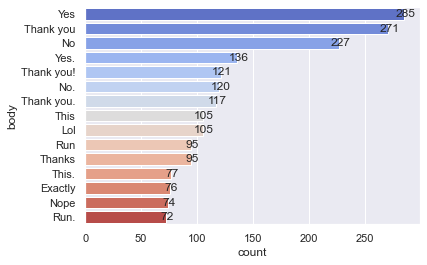

In [192]:
# Countplot für die "body"-Spalte mit den Top 3 Werten erstellen
sns.set(style="darkgrid")
ax = sns.countplot(y="body", data=df, palette="coolwarm",
              order=df.body.value_counts().iloc[:15].index)

# Counts in das Plot-Diagramm einfügen
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width() + 1, p.get_y() + p.get_height() / 2), ha='center', va='center')

# Counts für die Werte in der "body"-Spalte ausgeben
print(df["body"].value_counts().iloc[40:60])

In [190]:
df = df[df['body'] != 'RemindMe! 1 day']

In [180]:
df = df[df['body'] != '?']

In [188]:

df = df[df['body'] != '!updateme']

In [186]:
#RemindMe! 1 day 
df = df[df['body'] != 'RemindMe! 1 day ']

In [193]:
#df[df['body'].str.contains("If you or someone you know is contemplating suicide")]
#hotlinehelpbot
df[df['author'].str.contains("hotlinehelpbot")]

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [194]:
df = df[~df['body'].str.contains("RemindMe! 1 day")]

In [195]:
df[df['author'].str.contains("Reddit-Book-Bot")]

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [196]:
df[df['body'].str.contains("Beep.")]

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [197]:
df = df[~df['author'].str.contains("WikiMobileLinkBot")]

In [198]:
df = df[~df['author'].str.contains("mollyec")]

In [199]:
df = df[~df['author'].str.contains("Listening70")]

In [200]:
df = df[~df['author'].str.contains("paragraphiser_bot")]

In [201]:
df = df[~df['author'].str.contains("NoGoogleAMPBot")]

In [202]:
df[df['body'].str.contains("boop")]

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
357835,LadyAbbysFlower,0,They are just so floofy a boopable,0,2022-11-15 12:34:20,0,0,0,iwg9i2q,t3_yur391,t1_iwfd4zd,1,0,12,15,2022
526051,PenkieR,0,I see what you mean. Is it dry even in real li...,0,2022-11-22 12:32:40,0,0,0,ixciwz6,t3_z1rzya,t1_ixcio0h,1,0,12,22,2022
543302,AngstyTheCat,0,"I don't think your request is unreasonable, yo...",1,2022-11-23 04:07:36,0,0,0,ixg1rfj,t3_z2emq8,t3_z2emq8,1,0,4,23,2022
590168,NotYourTypicalChad78,0,Getting over SA isn't like you can wave a magi...,0,2022-11-25 06:35:07,0,0,0,ixpeadq,t3_z3pi7q,t3_z3pi7q,3,0,6,25,2022
595768,Satanic_Sanic,0,"Couldn't just give the name of the song, could...",0,2022-11-25 14:58:27,0,0,0,ixqicw7,t3_z4c4e2,t1_ixq431y,5,0,14,25,2022


In [203]:
df = df[~df['author'].str.contains("reply-guy-bot")]

In [204]:
df = df[~df['author'].str.contains("sub_doesnt_exist_bot")]

In [205]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
Index: 567370 entries, 3 to 726616
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   author             567370 non-null  object        
 1   author_flair_text  567370 non-null  object        
 2   body               567370 non-null  object        
 3   controversiality   567370 non-null  object        
 4   created_utc        567370 non-null  datetime64[ns]
 5   distinguished      567370 non-null  object        
 6   edited             567370 non-null  object        
 7   gilded             567370 non-null  object        
 8   id                 567370 non-null  object        
 9   link_id            567370 non-null  object        
 10  parent_id          567370 non-null  object        
 11  score              567370 non-null  int64         
 12  stickied           567370 non-null  object        
 13  created_hour       567370 non-null  int64        

In [206]:
# Annahme: Sie haben bereits Ihren DataFrame df erstellt oder eingelesen

# Liste der zu löschenden Autorenwerte
zu_loeschende_autoren = ["Bot_Metric","paragraphiser_bot","PORTMANTEAU-BOT","TotesMessenger","RemindMeBot","RAdviceBot"]

# Lösche alle Zeilen, in denen die Spalte "author" die genannten Werte hat
df = df[~df['author'].isin(zu_loeschende_autoren)]

In [207]:
# Annahme: Sie haben bereits Ihren DataFrame df erstellt oder eingelesen

# Liste der zu löschenden Autorenwerte
zu_loeschende_autoren = ["wikipedia_answer_bot","B0tRank","couldshouldwouldbot","nicebot2","AmputatorBot","rickroll-counter","Post_To_SPS_Warning","morse-bot","linebreaker-bot"]

# Lösche alle Zeilen, in denen die Spalte "author" die genannten Werte hat
df = df[~df['author'].isin(zu_loeschende_autoren)]

In [208]:
# Annahme: Sie haben bereits Ihren DataFrame df erstellt oder eingelesen

# Liste der zu löschenden Autorenwerte
zu_loeschende_autoren = ["userleansbot"]

# Lösche alle Zeilen, in denen die Spalte "author" die genannten Werte hat
df = df[~df['author'].isin(zu_loeschende_autoren)]

In [209]:
# Annahme: Sie haben bereits Ihren DataFrame df erstellt oder eingelesen

# Liste der zu löschenden Autorenwerte
zu_loeschende_autoren = ["impaulsive4real","ReverseCaptioningBot","eazeaze","kelvin_bot"]

# Lösche alle Zeilen, in denen die Spalte "author" die genannten Werte hat
df = df[~df['author'].isin(zu_loeschende_autoren)]

In [210]:
# Annahme: Sie haben bereits Ihren DataFrame df erstellt oder eingelesen

# Liste der zu löschenden Autorenwerte
zu_loeschende_autoren = ["converter-bot","tiny_smile_bot","happy-cake-day-bot-","wikipedia_text_bot","ordinarybots","emojifyemojifier_bot","resavr_bot","EncouragementRobot"]

# Lösche alle Zeilen, in denen die Spalte "author" die genannten Werte hat
df = df[~df['author'].isin(zu_loeschende_autoren)]

In [211]:
# Annahme: Sie haben bereits Ihren DataFrame df erstellt oder eingelesen

# Liste der zu löschenden Autorenwerte
zu_loeschende_autoren = ["tiny_smile_bot","EncouragementRobot","ghost_of_dongerbot","ordinarybots","HIPPAbot","resavr_bot"]

# Lösche alle Zeilen, in denen die Spalte "author" die genannten Werte hat
df = df[~df['author'].isin(zu_loeschende_autoren)]

In [212]:
# Annahme: Sie haben bereits Ihren DataFrame df erstellt oder eingelesen

# Liste der zu löschenden Autorenwerte
zu_loeschende_autoren = ["EncouragementRobot","resavr_bot","cool-acronym-bot","	the_timezone_bot","tiny_smile_bot",""]

# Lösche alle Zeilen, in denen die Spalte "author" die genannten Werte hat
df = df[~df['author'].isin(zu_loeschende_autoren)]

In [213]:
# Annahme: Sie haben bereits Ihren DataFrame df erstellt oder eingelesen

# Liste der zu löschenden Autorenwerte
zu_loeschende_autoren = ["kzreminderbot",""]

# Lösche alle Zeilen, in denen die Spalte "author" die genannten Werte hat
df = df[~df['author'].isin(zu_loeschende_autoren)]

In [214]:
# Annahme: Sie haben bereits Ihren DataFrame df erstellt oder eingelesen

# Liste der zu löschenden Autorenwerte
zu_loeschende_autoren = ["resavr_bot","societybot","by-accident-bot","morse-bot","icarebot","EncouragementRobot","trump_bot_cares","table_it_bot",""]

# Lösche alle Zeilen, in denen die Spalte "author" die genannten Werte hat
df = df[~df['author'].isin(zu_loeschende_autoren)]

In [215]:
# Annahme: Sie haben bereits Ihren DataFrame df erstellt oder eingelesen

# Liste der zu löschenden Autorenwerte
zu_loeschende_autoren = ["ordinarybots"]

# Lösche alle Zeilen, in denen die Spalte "author" die genannten Werte hat
df = df[~df['author'].isin(zu_loeschende_autoren)]

In [216]:
# Annahme: Sie haben bereits Ihren DataFrame df erstellt oder eingelesen

# Liste der zu löschenden Autorenwerte
zu_loeschende_autoren = ["RemindMeBot","WikiTextBot"]

# Lösche alle Zeilen, in denen die Spalte "author" die genannten Werte hat
df = df[~df['author'].isin(zu_loeschende_autoren)]

In [217]:
# Annahme: Sie haben bereits Ihren DataFrame df erstellt oder eingelesen

# Liste der zu löschenden Autorenwerte
zu_loeschende_autoren = ["WaterIsWetBot"]

# Lösche alle Zeilen, in denen die Spalte "author" die genannten Werte hat
df = df[~df['author'].isin(zu_loeschende_autoren)]

In [218]:
df = df[~df['author'].str.contains('Shrugfacebot')]

In [219]:

# Annahme: Sie haben bereits Ihren DataFrame df erstellt oder eingelesen

# Liste der zu löschenden Autorenwerte
zu_loeschende_autoren = ["HelperBot_","LimbRetrieval-Bot","TitleLinkHelperBot","UpdateMeBot","LinkifyBot","EmojifierBot","AbbrevTranslatorBot","RumDuckBot","Generic_Reddit_Bot","WikiSummarizerBot","UpdateMeBot","FatFingerHelperBot","RatedCommentBot","CouldWouldShouldBot"]

# Lösche alle Zeilen, in denen die Spalte "author" die genannten Werte hat
df = df[~df['author'].isin(zu_loeschende_autoren)]

In [220]:
# Annahme: Sie haben bereits Ihren DataFrame df erstellt oder eingelesen

# Liste der zu löschenden Autorenwerte
zu_loeschende_autoren = ["BananaFactBot","_whatbot_"]

# Lösche alle Zeilen, in denen die Spalte "author" die genannten Werte hat
df = df[~df['author'].isin(zu_loeschende_autoren)]

In [221]:
 #Annahme: Sie haben bereits Ihren DataFrame df erstellt oder eingelesen

# Liste der zu löschenden Autorenwerte
zu_loeschende_autoren = ["B0tRank","Dx_Meme_Bot_xD","ghost_of_dongerbot","UpdateMeBot","HelperBot_"]

# Lösche alle Zeilen, in denen die Spalte "author" die genannten Werte hat
df = df[~df['author'].isin(zu_loeschende_autoren)]

In [223]:
df = df[~df['author'].str.contains("sub_doesnt_exist_bot")]

In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 567344 entries, 3 to 726616
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   author             567344 non-null  object        
 1   author_flair_text  567344 non-null  object        
 2   body               567344 non-null  object        
 3   controversiality   567344 non-null  object        
 4   created_utc        567344 non-null  datetime64[ns]
 5   distinguished      567344 non-null  object        
 6   edited             567344 non-null  object        
 7   gilded             567344 non-null  object        
 8   id                 567344 non-null  object        
 9   link_id            567344 non-null  object        
 10  parent_id          567344 non-null  object        
 11  score              567344 non-null  int64         
 12  stickied           567344 non-null  object        
 13  created_hour       567344 non-null  int64        

# Http und Https and Redditnames removen

In [225]:
df = df.drop(df[df['author'] == 'AutoModerator'].index)

In [226]:
selected_sub_men=df[df['body'].str.fullmatch(r'/r/[^/\s]+')]
selected_sub_men

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
14714,StrayLilCat,0,/r/survivinginfedelity,0,2022-11-01 16:27:07,0,0,0,iun56fk,t3_yj9rtc,t3_yj9rtc,1,0,16,1,2022
21564,AuntyVenom,0,/r/legaladvice,0,2022-11-01 21:13:57,0,0,0,iuoeova,t3_yjktww,t3_yjktww,-1,0,21,1,2022
35180,Captain_Hampockets,0,/r/copypasta,0,2022-11-02 11:48:10,0,0,0,iuqyloo,t3_yju3vf,t3_yju3vf,1,0,11,2,2022
171187,Captain_Ass_Clown,0,/r/notlikeothergirls,0,2022-11-08 00:54:16,0,0,0,ivhlwrx,t3_yp6it1,t3_yp6it1,3,0,0,8,2022
191189,AuntyVenom,0,/r/legaladvice,1,2022-11-08 19:29:36,0,0,0,ivl3sxv,t3_ypvtea,t3_ypvtea,0,0,19,8,2022
203824,kinkyghost,0,/r/nonmonogamy,0,2022-11-09 05:42:56,0,0,0,ivner0u,t3_yq0np1,t3_yq0np1,8,0,5,9,2022
287051,FaxMeYourHoagies,0,/r/notopbutok,0,2022-11-12 16:07:25,0,0,0,iw328yt,t3_yt5u61,t1_iw2zwlg,2,0,16,12,2022
292925,stiick,0,/r/thathappened,0,2022-11-12 21:08:09,0,0,0,iw49g30,t3_ytbdup,t3_ytbdup,3,0,21,12,2022
312322,Emptyplates,0,/r/lostredditors,0,2022-11-13 16:52:05,0,0,0,iw7rwpg,t3_yu73m6,t3_yu73m6,1,0,16,13,2022
336423,Fineillcrackon,0,/r/nicegirls,0,2022-11-14 15:51:02,0,0,0,iwc7byf,t3_yv0tmr,t3_yv0tmr,3,0,15,14,2022


In [227]:
# Zeilen löschen, die der URL-Bedingung entsprechen
df = df.drop(selected_sub_men.index)

In [228]:
selected_rows = df[df['body'].str.match(r'^http://[^:/\s]+/[^:/\s]+$')]

# Die ausgewählten Zeilen anzeigen
selected_rows

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
281065,48911150,0,http://www.google.com/search?q=sillamirillion,0,2022-11-12 09:27:21,0,0,0,iw1zzqe,t3_ysvsxn,t1_iw1joh9,1,0,9,12,2022
281077,48911150,0,http://www.google.com/search?q=sillamirillion,0,2022-11-12 09:28:24,0,0,0,iw2021n,t3_ysvsxn,t1_iw1jlfz,1,0,9,12,2022
281078,48911150,0,http://www.google.com/search?q=sillamirillion,0,2022-11-12 09:28:36,0,0,0,iw202iq,t3_ysvsxn,t1_iw1mt1i,1,0,9,12,2022
281079,48911150,0,http://www.google.com/search?q=sillamirillion,0,2022-11-12 09:28:45,0,0,0,iw202vf,t3_ysvsxn,t1_iw1xl1d,1,0,9,12,2022


In [229]:
df = df.drop(selected_rows.index)

In [230]:
selected_rows_2 = df[df['body'].str.match(r'^https://[^:/\s]+/[^:/\s]+$')]

# Die ausgewählten Zeilen anzeigen
selected_rows_2

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
6111,not-feeling-ok,0,https://youtu.be/gUVFICtA2RM,0,2022-11-01 06:54:24,0,0,0,iulj0bz,t3_yiex0m,t1_iuji9ou,2,0,6,1,2022
49232,darknessnbeyond,0,https://youtu.be/nJZg0_E4ic8,0,2022-11-02 22:29:53,0,0,0,iutkavq,t3_yk7q3q,t1_iutjhju,4,0,22,2,2022
67320,ChaosCron1,0,https://youtu.be/nu6C2KL_S9o,0,2022-11-03 16:52:19,0,0,0,iuwy435,t3_yl57mh,t1_iuww1pc,11,0,16,3,2022
80770,a_song_4U,0,https://youtu.be/m_ErA63WGkU,0,2022-11-04 04:48:39,0,0,0,iuzny7w,t3_ylp3rk,t3_ylp3rk,1,0,4,4,2022
80910,a_song_4U,0,https://youtu.be/JX-Vlrpv8qI,0,2022-11-04 04:59:16,0,0,0,iuzowz1,t3_ylp9bp,t3_ylp9bp,2,0,4,4,2022
85580,Redjo52,0,https://youtu.be/PKqAQxveb3g,0,2022-11-04 12:26:20,0,0,0,iv0no0j,t3_ylsrrg,t1_iv05umy,1,0,12,4,2022
94773,1minormishapfrmchaos,0,https://m.youtube.com/watch?v=8A9cb4aVy2M,0,2022-11-04 20:17:32,0,0,0,iv2kvo1,t3_ym6sas,t1_iv2k0d2,3,0,20,4,2022
112182,AKA_RMc,0,https://www.youtube.com/watch?v=4Wd09hi2Pug,0,2022-11-05 17:14:34,0,0,0,iv6b0wy,t3_ymxzew,t3_ymxzew,1,0,17,5,2022
123913,Unusual_Library_197,0,https://youtu.be/2jqKiVHS6x4,0,2022-11-06 03:08:37,0,0,0,iv8llff,t3_yn073z,t1_iv8l7gl,1,0,3,6,2022
130512,Friendly_Shelter_625,0,https://www.urbandictionary.com/define.php?ter...,0,2022-11-06 13:44:48,0,0,0,iva4g8g,t3_ynpw5q,t1_iva38af,1,0,13,6,2022


In [231]:
df = df.drop(selected_rows_2.index)

In [232]:
selected_sub_men=df[df['body'].str.fullmatch(r'/r/[^/\s]+')]
selected_sub_men

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [233]:
selected_sub_men_two=df[df['body'].str.fullmatch(r'r/[^/\s]+')]
selected_sub_men_two

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
14554,PistachioNSFW,0,r/wooosh,0,2022-11-01 16:21:31,0,0,0,iun4bpb,t3_yj9rtc,t1_iun3a61,2,0,16,1,2022
32480,Ejmadd149,0,r/unexpectedoffice,0,2022-11-02 07:50:21,0,0,0,iuqgn9k,t3_yjlyc0,t1_iuqe0di,12,0,7,2,2022
38067,beefgerwich,0,r/lgbtq,0,2022-11-02 14:27:03,0,0,0,iuri3fv,t3_yk2hfs,t3_yk2hfs,1,0,14,2,2022
52422,softserveshittaco,0,r/gatekeeping,1,2022-11-03 01:13:24,0,0,0,iuu7812,t3_ykd447,t1_iuu715g,2,0,1,3,2022
56689,adventuref0x,0,r/real_relationship_advice,0,2022-11-03 05:10:46,0,0,0,iuuz2lv,t3_ykd447,t1_iuso7hv,6,0,5,3,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708349,Logical-Wasabi7402,0,r/oddlyspecific,0,2022-11-30 07:28:15,0,0,0,iyc1x9f,t3_z8fnvd,t3_z8fnvd,1,0,7,30,2022
710007,AgoraiosBum,0,r/cooking,0,2022-11-30 10:11:54,0,0,0,iycd7ve,t3_z8bpeb,t3_z8bpeb,2,0,10,30,2022
715133,Logical-Wasabi7402,0,r/legaladvice,0,2022-11-30 15:48:23,0,0,0,iydclba,t3_z8ur6c,t3_z8ur6c,5,0,15,30,2022
719815,ushermae,0,r/Iamverysmart,0,2022-11-30 19:18:38,0,0,0,iye97ar,t3_z8c1yy,t1_iycxeg9,1,0,19,30,2022


In [234]:
# Zeilen löschen, die der URL-Bedingung entsprechen
df = df.drop(selected_sub_men_two.index)

In [235]:
selected_rows = df[df['body'].str.match(r'^http://[^:/\s]+/[^:/\s]+$')]

# Die ausgewählten Zeilen anzeigen
selected_rows

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [236]:
selected_rows_2 = df[df['body'].str.match(r'^https://[^:/\s]+/[^:/\s]+$')]

# Die ausgewählten Zeilen anzeigen
selected_rows_2

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [237]:
import re

# Regulärer Ausdruck zum Erfassen von Zeilen, die nur aus Links/URLs bestehen
url_pattern = r'^https?://[^\s/$.?#].[^\s]*$'

# Anwenden des regulären Ausdrucks auf die 'body'-Spalte
url_only_rows = df[df['body'].str.match(url_pattern, flags=re.IGNORECASE)]
url_only_rows

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
2895,Basarav,0,https://www.cdc.gov/nchs/products/databriefs/d...,0,2022-11-01 02:50:28,0,0,0,iukxp6g,t3_yira6k,t1_iukvqcf,1,0,2,1,2022
20249,stellastellamaris,0,https://captainawkward.com/2013/08/22/506-507-...,0,2022-11-01 20:14:47,0,0,0,iuo5cuh,t3_yj7kh0,t3_yj7kh0,1,0,20,1,2022
38243,Sibali,0,https://www.reddit.com/r/relationship_advice/c...,0,2022-11-02 14:34:51,0,0,0,iurj7i2,t3_yk2hfs,t1_iurhm8r,2,0,14,2,2022
43032,stellastellamaris,0,https://captainawkward.com/2013/08/22/506-507-...,0,2022-11-02 18:01:25,0,0,0,iusex2c,t3_yjlyne,t1_iuqdr4l,2,0,18,2,2022
49485,ayeeatass,0,https://www.netflix.com/title/81087537,0,2022-11-02 22:40:02,0,0,0,iutlqe6,t3_yivjkl,t3_yivjkl,1,0,22,2,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700933,Low_Egg_7606,0,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...,1,2022-11-30 00:13:40,0,0,0,iyap3fv,t3_z859p8,t1_iyagyts,-4,0,0,30,2022
703614,RoryJSK,0,https://m.youtube.com/shorts/-8XKD518mbM,0,2022-11-30 02:23:05,0,0,0,iyb67hz,t3_z8c1yy,t1_iyawdj7,1,0,2,30,2022
718135,Strange_Device_371,0,https://open.spotify.com/episode/0Mb8JVzCMqFf4...,0,2022-11-30 18:07:42,0,0,0,iydy3ik,t3_z8c1yy,t1_iydvvr8,1,0,18,30,2022
719185,danrthemanr,0,https://www.cc.com/video/jwmvxd/chappelle-s-sh...,0,2022-11-30 18:50:02,0,0,0,iye4thg,t3_z8yhgr,t3_z8yhgr,1,0,18,30,2022


In [238]:
df.drop(url_only_rows.index, inplace=True)

# Deleting Bots

In [239]:
helper_bot_rows = df[df['body'].str.startswith('Helper bot')]
helper_bot_rows

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [240]:
df[df['author'] == 'theHelperdroid']

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [241]:
# Annahme: Sie haben bereits Ihren DataFrame df erstellt oder eingelesen

# Liste der zu löschenden Autorenwerte
zu_loeschende_autoren = ["Bot_Metric","paragraphiser_bot","PORTMANTEAU-BOT","TotesMessenger","RemindMeBot","RAdviceBot"]

# Lösche alle Zeilen, in denen die Spalte "author" die genannten Werte hat
df = df[~df['author'].isin(zu_loeschende_autoren)]

In [242]:
# Annahme: Sie haben bereits Ihren DataFrame df erstellt oder eingelesen

# Liste der zu löschenden Autorenwerte
zu_loeschende_autoren = ["wikipedia_answer_bot","B0tRank","couldshouldwouldbot","nicebot2","AmputatorBot","rickroll-counter","Post_To_SPS_Warning","morse-bot","linebreaker-bot"]

# Lösche alle Zeilen, in denen die Spalte "author" die genannten Werte hat
df = df[~df['author'].isin(zu_loeschende_autoren)]

In [243]:
# Annahme: Sie haben bereits Ihren DataFrame df erstellt oder eingelesen

# Liste der zu löschenden Autorenwerte
zu_loeschende_autoren = ["userleansbot"]

# Lösche alle Zeilen, in denen die Spalte "author" die genannten Werte hat
df = df[~df['author'].isin(zu_loeschende_autoren)]

In [244]:
# Annahme: Sie haben bereits Ihren DataFrame df erstellt oder eingelesen

# Liste der zu löschenden Autorenwerte
zu_loeschende_autoren = ["userleansbot"]

# Lösche alle Zeilen, in denen die Spalte "author" die genannten Werte hat
df = df[~df['author'].isin(zu_loeschende_autoren)]

In [245]:
import re

bot_in_body_rows = df[df['body'].str.contains(r'\b(bot)\b', case=False, regex=True)]
bot_in_body_rows

/var/folders/88/lkbjvmyj48n6h04_m1x2v3km0000gn/T/ipykernel_7425/2615394462.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  bot_in_body_rows = df[df['body'].str.contains(r'\b(bot)\b', case=False, regex=True)]


,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
966,FakespotAnalysisBot,0,This is a Fakespot Reviews Analysis bot. Fakes...,0,2022-11-01 01:00:17,0,0,0,iukjt0e,t3_yiu0l4,t3_yiu0l4,1,0,1,1,2022
2576,galaxy1985,0,How do you know it's a bot? Like how can I tel...,0,2022-11-01 02:34:59,0,0,0,iukvudy,t3_yi5zn6,t1_iujoecs,5,0,2,1,2022
6362,itsBreathenotBreath,calls out bots,**BOT ACCOUNT! DOWNVOTE &amp; REPORT.**,0,2022-11-01 07:21:34,0,0,0,iulks0i,t3_yipr00,t1_iuliy2v,5,0,7,1,2022
6535,itsBreathenotBreath,calls out bots,**BOT ACCOUNT! DOWNVOTE ARE REPORT.**,0,2022-11-01 07:40:26,0,0,0,iullzd6,t3_yisynw,t1_iuliyk3,20,0,7,1,2022
6546,itsBreathenotBreath,calls out bots,**BOT ACCOUNT! DOWNVOTE AND REPORT!**\n\nTaggi...,0,2022-11-01 07:41:11,0,0,0,iulm15j,t3_yiwlrw,t1_iulizz3,38,0,7,1,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711621,Sahareaovnight,0,Being left at home or told I am going but your...,0,2022-11-30 12:20:15,0,0,0,iycn568,t3_z8b7yz,t3_z8b7yz,1,0,12,30,2022
718194,birthdaycakedownfall,0,Yes it is an AI bot. Apparently the app sends ...,0,2022-11-30 18:10:29,0,0,0,iydyjaz,t3_z8xzq4,t1_iydy1iy,1,0,18,30,2022
718271,AmishSky,0,I doubt it. Though the fact that this bot can ...,0,2022-11-30 18:14:22,0,0,0,iydz577,t3_z8xzq4,t1_iydyjaz,1,0,18,30,2022
723122,verukazalt,0,Bot sure how sleeping with as many girls as po...,0,2022-11-30 21:42:28,0,0,0,iyevlcc,t3_z8y56c,t3_z8y56c,1,0,21,30,2022


In [259]:
bot_in_body_rows.iloc[260:280]

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
706067,Renent,0,"This is straight up bot shit... lololol ""lara ...",0,2022-11-30 04:25:57,0,0,0,iyblacz,t3_z8d3uw,t3_z8d3uw,4,0,4,30,2022
708705,dotslashpunk,0,i have seriously thought about making a bot fo...,0,2022-11-30 07:59:52,0,0,0,iyc48g7,t3_z82wg7,t1_iyauate,2,0,7,30,2022
711621,Sahareaovnight,0,Being left at home or told I am going but your...,0,2022-11-30 12:20:15,0,0,0,iycn568,t3_z8b7yz,t3_z8b7yz,1,0,12,30,2022
718194,birthdaycakedownfall,0,Yes it is an AI bot. Apparently the app sends ...,0,2022-11-30 18:10:29,0,0,0,iydyjaz,t3_z8xzq4,t1_iydy1iy,1,0,18,30,2022
718271,AmishSky,0,I doubt it. Though the fact that this bot can ...,0,2022-11-30 18:14:22,0,0,0,iydz577,t3_z8xzq4,t1_iydyjaz,1,0,18,30,2022
723122,verukazalt,0,Bot sure how sleeping with as many girls as po...,0,2022-11-30 21:42:28,0,0,0,iyevlcc,t3_z8y56c,t3_z8y56c,1,0,21,30,2022
724901,MusicLava1983,0,LOL. Ignore people like u/seekingaccount. It i...,0,2022-11-30 23:02:38,0,0,0,iyf7169,t3_z92svi,t1_iyevmp0,-40,0,23,30,2022


In [260]:
# Annahme: Sie haben bereits Ihren DataFrame df erstellt oder eingelesen

# Liste der zu löschenden Autorenwerte
zu_loeschende_autoren = ["FakespotAnalysisBot","itsBreathenotBreath","BelmontIncident"]

# Lösche alle Zeilen, in denen die Spalte "author" die genannten Werte hat
df = df[~df['author'].isin(zu_loeschende_autoren)]

In [261]:
 df[df['author'] == 'AdviceHelperBot']

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [262]:
df_bot=pd.read_csv("bot_names.csv")

In [263]:
df_bot["Bot Name"].values.tolist()

selection = df_bot["Bot Name"].values.tolist()
mask = df["author"].apply(lambda x: any(item for item in selection if item in x)) 

In [264]:
df_check_bot=df.filter(items = mask[mask].index, axis=0)

In [265]:
df_check_bot

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
9,modernwunder,Late 20s,This is some white savior nonsense. You don’t ...,0,2022-11-01 00:00:31,0,0,0,iukc4pr,t3_yiq1r7,t3_yiq1r7,14,0,0,1,2022
349,iLiveInAHologram94,0,There’s a dumb internet for the boys called no...,0,2022-11-01 00:22:01,0,0,0,iukeux4,t3_yiq3tl,t3_yiq3tl,1,0,0,1,2022
374,Deep_thots_9000,0,What are balloons?,0,2022-11-01 00:23:17,0,0,0,iukf0rl,t3_yiphis,t3_yiphis,2,0,0,1,2022
531,redditlanderrr,0,Well.. in a nutshell.. yeah basically,0,2022-11-01 00:31:49,0,0,0,iukg4dr,t3_yiq3tl,t1_iukd6u7,4,0,0,1,2022
596,weirdredditautoname,0,If you address your husband you could die. Pl...,0,2022-11-01 00:35:45,0,0,0,iukgmj7,t3_yiex0m,t3_yiex0m,9,0,0,1,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726064,Dry-Understanding713,0,"That’s not ok, I think yall definitely need to...",0,2022-11-30 23:41:13,0,0,0,iyfc8ca,t3_z92rng,t1_iyfb5ur,7,0,23,30,2022
726318,rockabyebottom,0,I am in a different country and i have no fami...,0,2022-11-30 23:49:41,0,0,0,iyfdc1z,t3_z96kpe,t1_iyfcqmv,1,0,23,30,2022
726362,jesuschin,0,If you're concerned then you're concerned. The...,0,2022-11-30 23:51:27,0,0,0,iyfdkdm,t3_z968cb,t3_z968cb,14,0,23,30,2022
726439,redditatwork1986,0,You’re an idiot and the world will be worse of...,0,2022-11-30 23:54:05,0,0,0,iyfdwrg,t3_z96d8b,t3_z96d8b,2,0,23,30,2022


In [266]:
df_check_bot[df_check_bot['author'].str.contains('bot')]

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
4668,thequestionbot,0,If you were in love with him why was not getti...,0,2022-11-01 04:33:50,0,0,0,iul8e66,t3_yira6k,t1_iuk4e9i,1,0,4,1,2022
24867,reddit_toast_bot,0,He also has a wife probably.\n\nI mean lies ar...,0,2022-11-01 23:51:51,0,0,0,iup1md9,t3_yjn5q5,t3_yjn5q5,1,0,23,1,2022
51193,itchybottombees,0,Stop posting this,0,2022-11-03 00:03:45,0,0,0,iutxbsm,t3_ykk1py,t3_ykk1py,1,0,0,3,2022
69783,Chick-fil-A_spellbot,0,"It looks as though you may have spelled ""Chick...",0,2022-11-03 18:29:38,0,0,0,iuxdg67,t3_yl63kd,t1_iuxdf0t,-25,0,18,3,2022
71371,nudes-bot,0,22 year olds are very stable geniuses,0,2022-11-03 19:40:06,0,0,0,iuxoh9i,t3_yl8yx4,t1_iuxgrtf,13,0,19,3,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
721752,lesterbottomley,0,"Had to scroll way too far down to see this, pa...",1,2022-11-30 20:43:35,0,0,0,iyemgy2,t3_z8qwji,t1_iyeeexf,4,0,20,30,2022
721796,lesterbottomley,0,If it was without her then he wouldn't be aski...,0,2022-11-30 20:45:41,0,0,0,iyemst9,t3_z8qwji,t1_iyegwd6,8,0,20,30,2022
725472,rockabyebottom,0,Okay thank you for your honest opinion. I hope...,0,2022-11-30 23:22:14,0,0,0,iyf9pus,t3_z96kpe,t1_iyf983e,6,0,23,30,2022
725492,rockabyebottom,0,Okay thanks for the advice.,0,2022-11-30 23:22:52,0,0,0,iyf9swp,t3_z96kpe,t1_iyf8ew2,1,0,23,30,2022


In [275]:
df_check_bot[df_check_bot['author'].str.contains('bot')].iloc[160:166]

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
721752,lesterbottomley,0,"Had to scroll way too far down to see this, pa...",1,2022-11-30 20:43:35,0,0,0,iyemgy2,t3_z8qwji,t1_iyeeexf,4,0,20,30,2022
721796,lesterbottomley,0,If it was without her then he wouldn't be aski...,0,2022-11-30 20:45:41,0,0,0,iyemst9,t3_z8qwji,t1_iyegwd6,8,0,20,30,2022
725472,rockabyebottom,0,Okay thank you for your honest opinion. I hope...,0,2022-11-30 23:22:14,0,0,0,iyf9pus,t3_z96kpe,t1_iyf983e,6,0,23,30,2022
725492,rockabyebottom,0,Okay thanks for the advice.,0,2022-11-30 23:22:52,0,0,0,iyf9swp,t3_z96kpe,t1_iyf8ew2,1,0,23,30,2022
726318,rockabyebottom,0,I am in a different country and i have no fami...,0,2022-11-30 23:49:41,0,0,0,iyfdc1z,t3_z96kpe,t1_iyfcqmv,1,0,23,30,2022


In [278]:
# Annahme: Sie haben bereits Ihren DataFrame df erstellt oder eingelesen

# Liste der zu löschenden Autorenwerte
zu_loeschende_autoren = ["JustAnAlpacaBot"]

# Lösche alle Zeilen, in denen die Spalte "author" die genannten Werte hat
df = df[~df['author'].isin(zu_loeschende_autoren)]

In [277]:
df_check_bot[df_check_bot['author'].str.contains('Bot')]

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
161474,Graggy-Bot,0,"Zero advice, alot of sass am I in the right su...",1,2022-11-07 18:09:42,0,0,0,ivfy6gu,t3_yotp87,t1_ivfv7yd,-20,0,18,7,2022
189550,RussianBot4826374,0,My God. There's no reason to rent a hotel room...,0,2022-11-08 18:26:51,0,0,0,ivktvw4,t3_ypo7lo,t1_ivkaazy,42,0,18,8,2022
189877,RussianBot4826374,0,"Sorry dude, I've worked in healthcare for 22 y...",0,2022-11-08 18:40:08,0,0,0,ivkvzy5,t3_ypo7lo,t1_ivkgol9,1,0,18,8,2022
235428,Certainly-Not-A-Bot,0,"&gt;It’s valid, but then again, if you can pos...",1,2022-11-10 14:48:00,0,0,0,ivtkp5n,t3_yrao2i,t1_ivtgzz8,1,0,14,10,2022
349315,JustAnAlpacaBot,0,Hello there! I am a bot raising awareness of A...,0,2022-11-15 02:10:07,0,0,0,iwepfcu,t3_yvekdb,t1_iwepe9e,9,0,2,15,2022
699254,Graggy-Bot,0,Why don't you go to therapy and find out,0,2022-11-29 22:57:25,0,0,0,iyaejka,t3_z86j3e,t1_iyacums,4,0,22,29,2022


In [280]:
df_check_bot[df_check_bot['body'].str.contains('bot')]

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
1814,Due-Kangaroo-8537,0,I don’t think we can really answer this. What ...,0,2022-11-01 01:53:06,0,0,0,iukqkyc,t3_yicrti,t3_yicrti,1,0,1,1,2022
2351,Topdoghotmom,0,Well your husband is making a total fool of hi...,0,2022-11-01 02:21:57,0,0,0,iuku8le,t3_yispv2,t3_yispv2,0,0,2,1,2022
4077,NDaveT,0,Your husband and your boss are both out of lin...,1,2022-11-01 03:57:56,0,0,0,iul50gv,t3_yisynw,t3_yisynw,2,0,3,1,2022
5963,CynicalAlgorithm,0,You're really flinging your hands up in the ai...,0,2022-11-01 06:40:24,0,0,0,iuli24f,t3_yiur6c,t1_iukuezv,94,0,6,1,2022
6804,modernwunder,Late 20s,If it’s a mental issue there’s not really anyt...,0,2022-11-01 08:07:47,0,1,0,iulnqaf,t3_yj1d6o,t3_yj1d6o,3,0,8,1,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719032,CookieCaliforna,0,*Cough* self-sabotaging *cough*,0,2022-11-30 18:43:56,0,0,0,iye3umw,t3_z8u91r,t3_z8u91r,2,0,18,30,2022
720623,PhotographyByAdri,0,"I have Fibromyalgia, a pretty severe case, and...",0,2022-11-30 19:55:57,0,0,0,iyef0c5,t3_z8cego,t1_iycmmmc,45,0,19,30,2022
722171,Agreeable_Mango_1288,0,"She was out having a good time, and didn't wan...",0,2022-11-30 21:01:18,0,1,0,iyep8tp,t3_z8p8l3,t3_z8p8l3,-3,0,21,30,2022
723329,Pame_in_reddit,0,My husband has this “I despise you” face that ...,0,2022-11-30 21:50:36,0,0,0,iyewsrh,t3_z8c1yy,t1_iyb9gw2,1,0,21,30,2022


# NLP Deleting

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv("relationship_advise_22_comments_EDA_clean.csv",sep=",")

/Users/anthonyfernando/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566393 entries, 0 to 566392
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   author             566393 non-null  object
 1   author_flair_text  566393 non-null  object
 2   body               566393 non-null  object
 3   controversiality   566393 non-null  int64 
 4   created_utc        566393 non-null  object
 5   distinguished      566393 non-null  object
 6   edited             566393 non-null  int64 
 7   gilded             566393 non-null  int64 
 8   id                 566393 non-null  object
 9   link_id            566393 non-null  object
 10  parent_id          566393 non-null  object
 11  score              566393 non-null  int64 
 12  stickied           566393 non-null  int64 
 13  created_hour       566393 non-null  int64 
 14  created_day        566393 non-null  int64 
 15  created_year       566393 non-null  int64 
dtypes: int64(8), object(

In [5]:
import redditcleaner
df['body'] = df['body'].map(redditcleaner.clean)

In [6]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import emoji

# Schritt 1: Emojis und Emoticons in Emojis umwandeln, aber Kleinbuchstaben beibehalten
def convert_emoticons_and_emojis(text):
    text = emoji.demojize(text)
    return text

# Schritt 2: Tokenisierung
nltk.download('punkt')

# Schritt 3: Entfernen von Stoppwörtern
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))  # Verwenden Sie die passende Sprache

# Schritt 4: Entfernen von Sonderzeichen und URLs
def clean_text(text):
    # Entfernen von HTML-Tags
    text = re.sub(r'<.*?>', '', text)
    
    # Entfernen von URLs
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'https\S+', '', text)
    
    # Entfernen von Zahlen
    text = re.sub('[0-9]+', '', text)
    
    text = re.sub(r'/r/[A-Za-z0-9_]+', '', text)
    text = re.sub(r'r/[A-Za-z0-9_]+', '', text) # mit subreddit löschen
    
    # Entfernen von Sonderzeichen außer Buchstaben, Zahlen und Punkten
    text = re.sub('[^A-Za-z0-9.]+', ' ', text)
    
    # Tokenisierung
    words = word_tokenize(text)
    
    # Entfernen von Stoppwörtern
    #words = [word for word in words if word not in stop_words]
    
    # Entfernen von leeren Wörtern
    words = [word for word in words if word.strip() != '']
    
    return ' '.join(words)

# Anwenden der Bereinigungsfunktion auf den Text in der Spalte 'body'
df['clean_text'] = df['body'].apply(lambda x: convert_emoticons_and_emojis(x))
df['clean_text'] = df['clean_text'].apply(clean_text)

# Anzeigen des resultierenden DataFrames
print(df[['body', 'clean_text']])

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/anthonyfernando/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anthonyfernando/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                     body  \
0       One of my exs was the same. I knew he was smok...   
1       Children are not their parents keeper or thera...   
2       If a relationship is supposed to work you have...   
3       Ew ew ew ew he’s a pedo ew ew ew ew ew dump hi...   
4       It only works if you tell them instantly. Othe...   
...                                                   ...   
566388  Doesn't matter. She wants it and he doesn't. S...   
566389  All unwanted pregnancies are caused by irrespo...   
566390  Ok, great for you guys. But it doesn’t invalid...   
566391  It wasn't so much of time as it was that one d...   
566392  I'm sorry...you are worried about his feelings...   

                                               clean_text  
0       One of my exs was the same . I knew he was smo...  
1       Children are not their parents keeper or thera...  
2       If a relationship is supposed to work you have...  
3       Ew ew ew ew he s a 

In [7]:
df["comment_len"] = df["clean_text"].apply (lambda x: len(x.split()))

In [8]:
import pandas as pd

# Annahme: Du hast bereits ein DataFrame df erstellt

# Filtere die Zeilen, in denen "comment_len" den Wert 0 hat
filtered_df = df[df['comment_len'] == 0]

# Jetzt enthält filtered_df nur die Zeilen, in denen "comment_len" den Wert 0 hat
filtered_df

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year,clean_text,comment_len
2944,softserveshittaco,0,15,0,2022-11-01 03:26:27,0,0,0,iul1rj1,t3_yipr00,t1_iuksqmm,50,0,3,1,2022,,0
3627,ChonkyLicoriceKitty,0,33,0,2022-11-01 04:12:45,0,0,0,iul6g38,t3_yiy7yy,t1_iul5qz8,1,0,4,1,2022,,0
3652,Wrong_Bat_9636,0,,0,2022-11-01 04:15:03,0,0,0,iul6o1x,t3_yispv2,t1_iukwlwy,1,0,4,1,2022,,0
3717,Sensitive_Banana_404,0,+1,0,2022-11-01 04:20:08,0,0,0,iul756j,t3_yituld,t1_iul3djm,-12,0,4,1,2022,,0
4669,Ok_Inevitable_6362,0,,0,2022-11-01 06:04:52,0,0,0,iulfm62,t3_yiz5wz,t3_yiz5wz,1,0,6,1,2022,,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554931,ClassicApartment2652,0,3…,0,2022-11-30 12:06:45,0,0,0,iyclwyp,t3_z8oyd1,t1_iyclnkf,-7,0,12,30,2022,,0
555580,GG2088,0,,0,2022-11-30 13:15:21,0,0,0,iycspvi,t3_z8r4fq,t3_z8r4fq,3,0,13,30,2022,,0
559841,Seltz_,0,,0,2022-11-30 17:58:12,0,0,0,iydwlgv,t3_z8u91r,t3_z8u91r,1,0,17,30,2022,,0
563722,SugarGlitterkiss,0,3,0,2022-11-30 21:42:22,0,0,0,iyevkss,t3_z8zj73,t1_iyevh9d,1,0,21,30,2022,,0


In [9]:
df = df[df['comment_len'] != 0]

# Final EDA

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 566008 entries, 0 to 566392
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   author             566008 non-null  object
 1   author_flair_text  566008 non-null  object
 2   body               566008 non-null  object
 3   controversiality   566008 non-null  int64 
 4   created_utc        566008 non-null  object
 5   distinguished      566008 non-null  object
 6   edited             566008 non-null  int64 
 7   gilded             566008 non-null  int64 
 8   id                 566008 non-null  object
 9   link_id            566008 non-null  object
 10  parent_id          566008 non-null  object
 11  score              566008 non-null  int64 
 12  stickied           566008 non-null  int64 
 13  created_hour       566008 non-null  int64 
 14  created_day        566008 non-null  int64 
 15  created_year       566008 non-null  int64 
 16  clean_text         5

In [11]:
df.describe()

,controversiality,edited,gilded,score,stickied,created_hour,created_day,created_year,comment_len
count,566008.000000,566008.000000,566008.000000,566008.000000,566008.0,566008.000000,566008.000000,566008.0,566008.000000
mean,0.031765,0.023217,0.000279,13.031492,0.0,12.433294,14.959547,2022.0,56.898429
std,0.175373,0.150592,0.018028,95.355541,0.0,7.232563,8.682876,0.0,67.264411
min,0.000000,0.000000,0.000000,-1596.000000,0.0,0.000000,1.000000,2022.0,1.000000
25%,0.000000,0.000000,0.000000,1.000000,0.0,6.000000,8.000000,2022.0,17.000000
50%,0.000000,0.000000,0.000000,2.000000,0.0,14.000000,14.000000,2022.0,36.000000
75%,0.000000,0.000000,0.000000,4.000000,0.0,19.000000,22.000000,2022.0,73.000000
max,1.000000,1.000000,3.000000,7781.000000,0.0,23.000000,30.000000,2022.0,1906.000000


In [12]:
df.head()

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year,clean_text,comment_len
0,eebieteebie,0,One of my exs was the same. I knew he was smok...,0,2022-11-01 00:00:12,0,0,0,iukc3bp,t3_yisjyh,t3_yisjyh,2,0,0,1,2022,One of my exs was the same . I knew he was smo...,106
1,BisquickNinja,0,Children are not their parents keeper or thera...,0,2022-11-01 00:00:15,0,0,0,iukc3kp,t3_yim2ky,t3_yim2ky,2,0,0,1,2022,Children are not their parents keeper or thera...,83
2,eyecicey,0,If a relationship is supposed to work you have...,0,2022-11-01 00:00:24,0,0,0,iukc47z,t3_yisr17,t3_yisr17,1,0,0,1,2022,If a relationship is supposed to work you have...,88
3,AutisticMuffin97,0,Ew ew ew ew he’s a pedo ew ew ew ew ew dump hi...,0,2022-11-01 00:00:25,0,0,0,iukc4ai,t3_yihovt,t3_yihovt,1,0,0,1,2022,Ew ew ew ew he s a pedo ew ew ew ew ew dump hi...,18
4,SnooFoxes4362,0,It only works if you tell them instantly. Othe...,0,2022-11-01 00:00:29,0,0,0,iukc4kk,t3_yiiuen,t3_yiiuen,6,0,0,1,2022,It only works if you tell them instantly . Oth...,77


In [13]:
df.tail()

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year,clean_text,comment_len
566388,WalkingTombst0ne,0,Doesn't matter. She wants it and he doesn't. S...,0,2022-11-30 23:59:47,0,0,0,iyfen6k,t3_z95b67,t1_iyfa2wd,-20,0,23,30,2022,Doesn t matter . She wants it and he doesn t. ...,38
566389,Jane_Says_So,0,All unwanted pregnancies are caused by irrespo...,1,2022-11-30 23:59:49,0,0,0,iyfenaj,t3_z96d8b,t1_iyf9wkl,2,0,23,30,2022,All unwanted pregnancies are caused by irrespo...,23
566390,0OOOOOOOOO0,0,"Ok, great for you guys. But it doesn’t invalid...",0,2022-11-30 23:59:56,0,0,0,iyfenun,t3_z95b67,t1_iyfdolq,2,0,23,30,2022,Ok great for you guys . But it doesn t invalid...,17
566391,pm_ur_sweaterpuppets,0,It wasn't so much of time as it was that one d...,0,2022-11-30 23:59:58,0,0,0,iyfeo0s,t3_z961cj,t3_z961cj,1,0,23,30,2022,It wasn t so much of time as it was that one d...,53
566392,Francesca_N_Furter,0,I'm sorry...you are worried about his feelings...,0,2022-11-30 23:59:58,0,0,0,iyfeo1y,t3_z97pnf,t3_z97pnf,17,0,23,30,2022,I m sorry ... you are worried about his feelin...,50


# Controversilty

In [14]:
df['controversiality'] = df['controversiality'].replace(0,False)
df['controversiality'] = df['controversiality'].replace(1,True)

False    548029
True      17979
Name: controversiality, dtype: int64


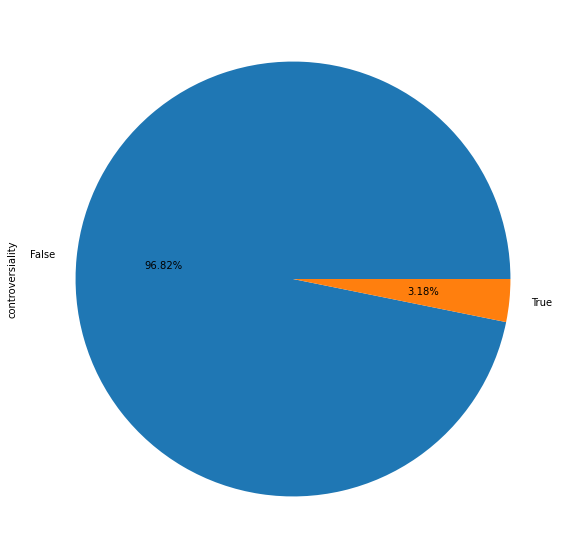

In [15]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["controversiality"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["controversiality"].value_counts())

# Stickied

In [16]:
df['stickied'] = df['stickied'].replace(0,False)
df['stickied'] = df['stickied'].replace(1,True)

False    566008
Name: stickied, dtype: int64


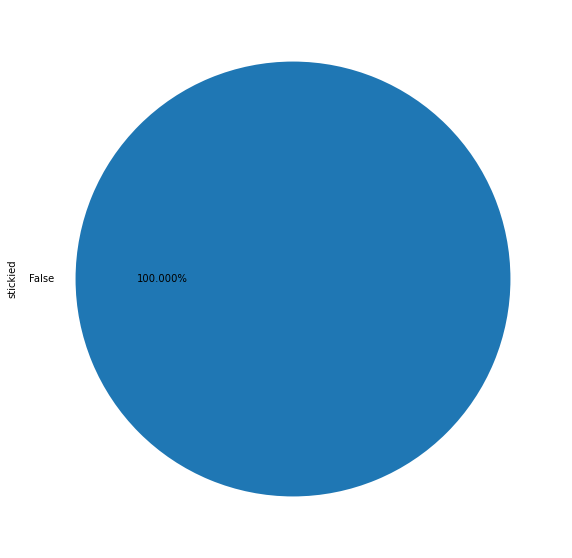

In [17]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["stickied"].value_counts().plot(kind='pie', autopct='%1.3f%%')
print(df["stickied"].value_counts())

# Link_id

t3_yu7k2s    1054
t3_ywvyut     937
t3_yk2hfs     806
t3_z7tfwz     795
t3_yko9a3     777
             ... 
t3_yt0mfr       1
t3_z4011u       1
t3_yt42jt       1
t3_yt3kyi       1
t3_z97pnf       1
Name: link_id, Length: 41668, dtype: int64


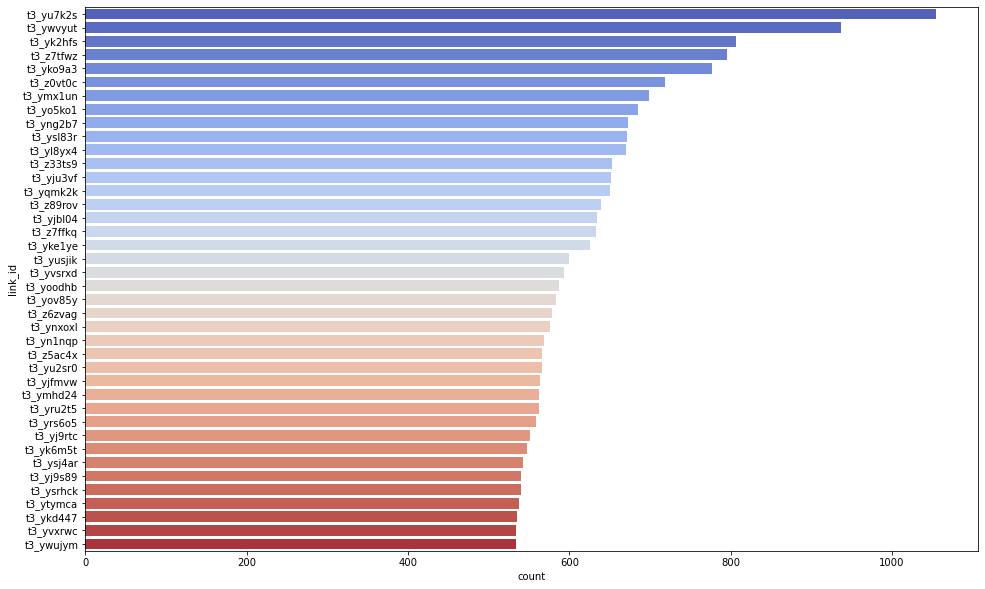

In [18]:
fig = plt.figure(figsize=(16,10))
sns.countplot(y="link_id", data=df, palette="coolwarm",
              order=df.link_id.value_counts().iloc[:40].index)
print(df["link_id"].value_counts())

In [19]:
total_submissions = df['link_id'].nunique()

# Das Ergebnis anzeigen
print(f'Gesamtanzahl der Einreichungen (Submissions): {total_submissions}')

Gesamtanzahl der Einreichungen (Submissions): 41668


# Author

<AxesSubplot:xlabel='count', ylabel='author'>

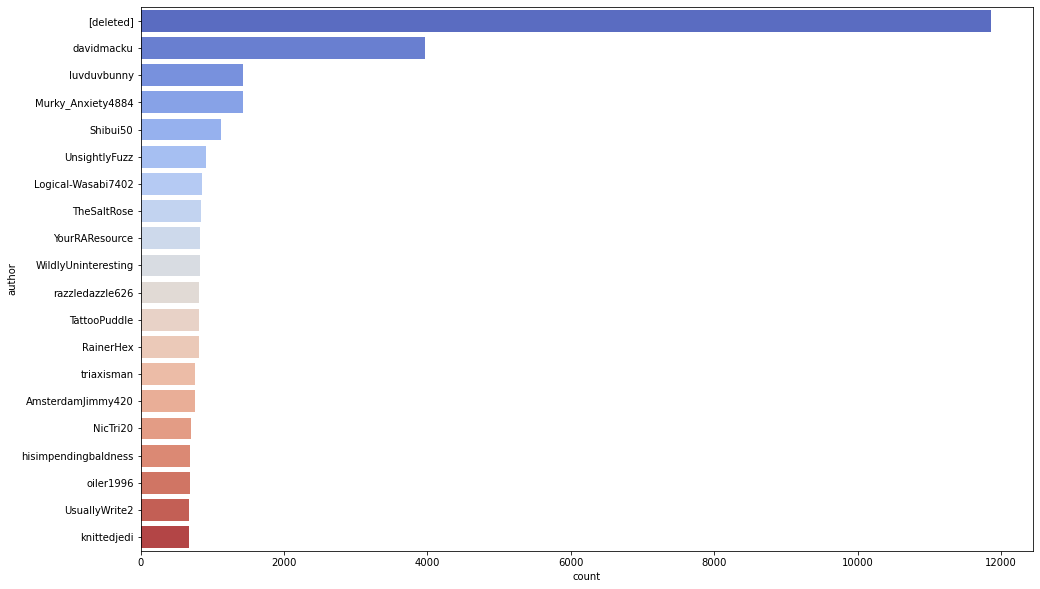

In [20]:
fig = plt.figure(figsize=(16,10))
sns.countplot(y="author", data=df, palette="coolwarm",
              order=df.author.value_counts().iloc[:20].index)

# Ohne Deleted

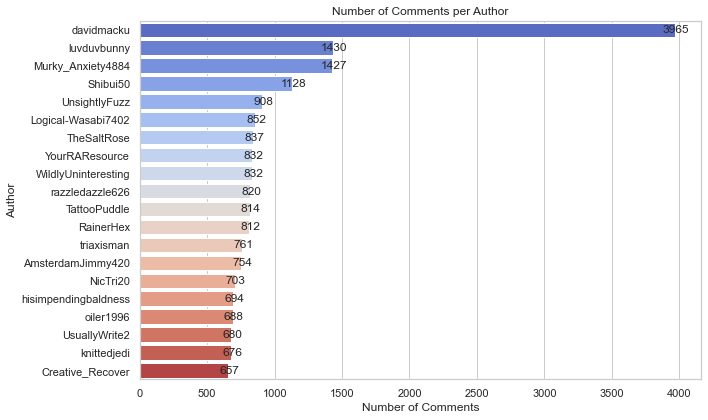

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: Du hast bereits ein DataFrame mit einer "author" Spalte (z.B., df)

# Top 5 Autoren nach Anzahl der Kommentare auswählen und "[deleted]" entfernen
top_authors = df[df['author'] != '[deleted]']['author'].value_counts().iloc[:20].index

# Sub-Datenframe nur mit den Top-Autoren erstellen (ohne "[deleted]")
top_comments = df[(df['author'].isin(top_authors)) & (df['author'] != '[deleted]')]

# Countplot erstellen
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
plot = sns.countplot(y="author", data=top_comments, palette="coolwarm", order=top_authors)

# Anzahl der Kommentare über den Balken anzeigen
for p in plot.patches:
    plot.annotate(format(p.get_width(), '.0f'),
                  (p.get_width() + 10, p.get_y() + p.get_height() / 2),
                  ha='center', va='center')

plt.xlabel("Number of Comments")
plt.ylabel("Author")
plt.title("Number of Comments per Author")

# Achsenbeschriftungen nicht abschneiden
plt.tight_layout()
plt.show()

In [22]:
total_author = df['author'].nunique()-1

# Das Ergebnis anzeigen
print(f'Gesamtanzahl der Authoren: {total_author}')

Gesamtanzahl der Authoren: 94521


In [23]:
# Group by "link_id" and count the number of comments per submission
submission_comment_counts = df.groupby('link_id')['body'].count()

# Calculate the average number of comments per submission
average_comments_per_submission = submission_comment_counts.mean()

# Display the result
print(f'Average number of comments per submission: {average_comments_per_submission:.2f}')

Average number of comments per submission: 13.58


In [24]:
author_comment_counts = df.groupby('author')['body'].count()

# Calculate the average number of comments per author
average_comments_per_author = author_comment_counts.mean()

# Display the result
print(f'Average number of comments per author: {average_comments_per_author:.2f}')

Average number of comments per author: 5.99


# Hours

([<matplotlib.axis.XTick at 0x7f9e06998640>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

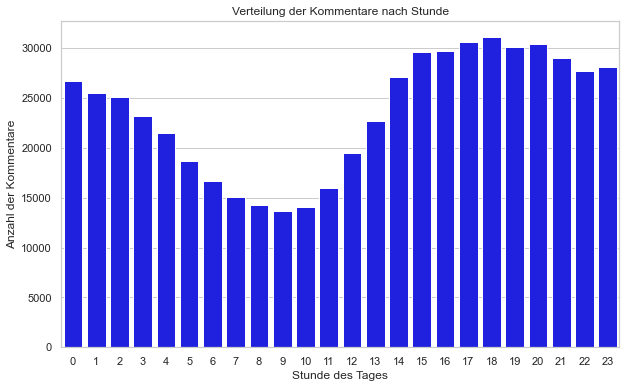

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: Du hast bereits den DataFrame "comments_new" geladen

# Extrahiere die Stunden aus der Spalte "created_utc"
#df['created_hour'] = pd.to_datetime(df['created_utc'], unit='s').dt.hour

# Erstelle das Countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='created_hour', color='blue')

plt.title('Verteilung der Kommentare nach Stunde')
plt.xlabel('Stunde des Tages')
plt.ylabel('Anzahl der Kommentare')
plt.xticks(range(24))  # Setze x-Achse auf Stunden

# Days

Text(0, 0.5, 'Anzahl der Kommentare')

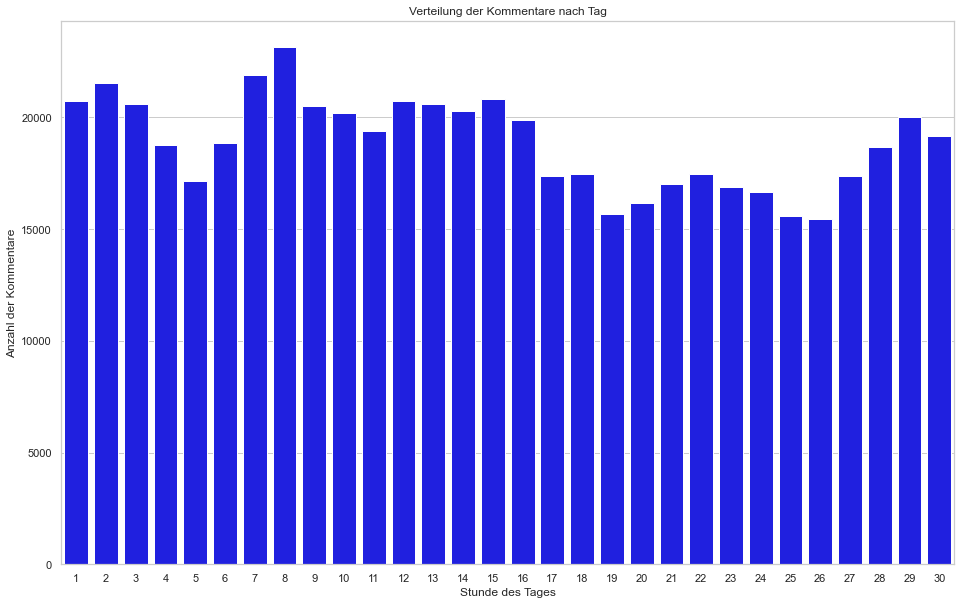

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: Du hast bereits den DataFrame "comments_new" geladen

# Extrahiere die Stunden aus der Spalte "created_utc"

# Erstelle das Countplot
fig = plt.figure(figsize=(16,10))
sns.countplot(data=df, x='created_day', color='blue')

plt.title('Verteilung der Kommentare nach Tag')
plt.xlabel('Stunde des Tages')
plt.ylabel('Anzahl der Kommentare')

# Gilded

0    565861
1       138
2         7
3         2
Name: gilded, dtype: int64


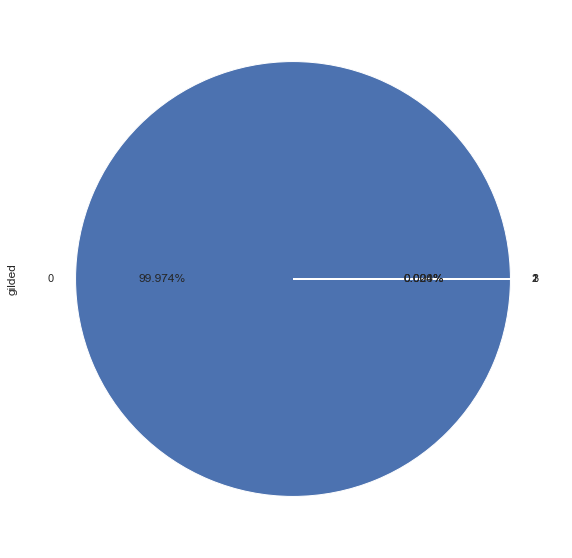

In [28]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["gilded"].value_counts().plot(kind='pie', autopct='%1.3f%%')
print(df["gilded"].value_counts())

# Distinguished

In [29]:
df["distinguished"] = df["distinguished"].replace(0,"0")
df["distinguished"] = df["distinguished"].replace("0",False)

False        566006
moderator         2
Name: distinguished, dtype: int64


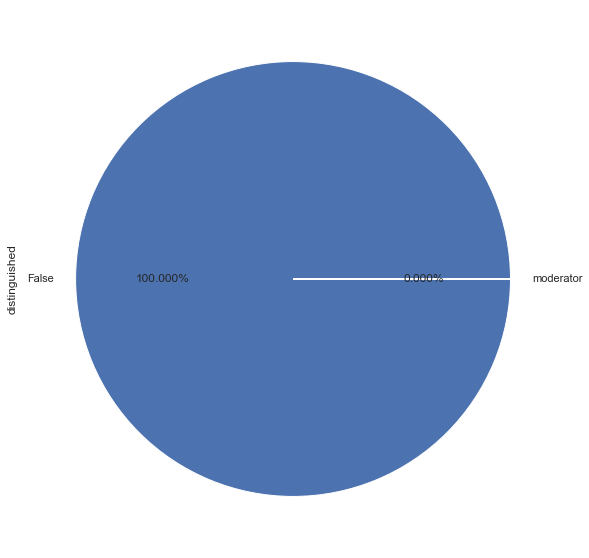

In [30]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["distinguished"].value_counts().plot(kind='pie', autopct='%1.3f%%')
print(df["distinguished"].value_counts())

# Edited

In [31]:
df['edited'] = df['edited'].replace(0,"0")
df['edited'] = df['edited'].replace(1,"1")
df['edited'] = df['edited'].replace("0",False)
df['edited'] = df['edited'].replace("1",True)

False    552867
True      13141
Name: edited, dtype: int64


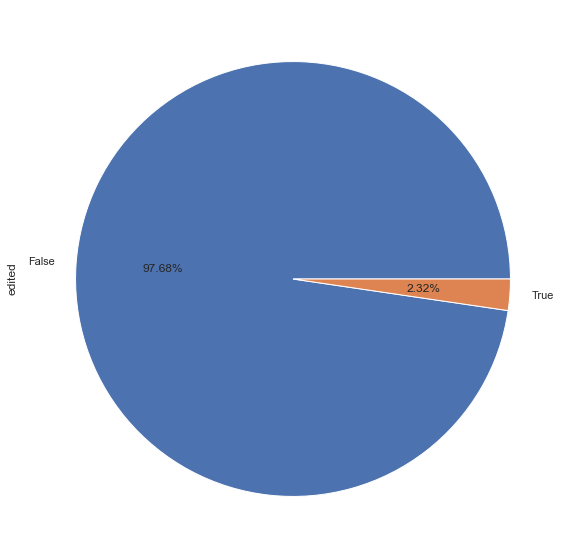

In [32]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["edited"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["edited"].value_counts())

# Score

In [33]:
df["score"].mean()

13.031492487738689

In [34]:
top_10_scores = df.nlargest(10, 'score')
top_10_scores

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year,clean_text,comment_len
474773,NidorinoBeano,0,This is your first date and he got physical wi...,False,2022-11-25 22:53:27,False,False,0,ixs9fwq,t3_z4qpqj,t3_z4qpqj,7781,False,22,25,2022,This is your first date and he got physical wi...,70
535538,TattooPuddle,Late 20s Female,He's a 28 year old dating a teenager. Of cours...,False,2022-11-29 13:14:11,False,True,1,iy81nci,t3_z7tfwz,t3_z7tfwz,7115,False,13,29,2022,He s a year old dating a teenager . Of course ...,37
468841,Kilyth,0,Get you and your baby somewhere safe and get h...,False,2022-11-25 15:27:18,False,False,0,ixqlwe4,t3_z4fw0j,t3_z4fw0j,6599,False,15,25,2022,Get you and your baby somewhere safe and get h...,13
29027,stressedtfo,0,Can you flag/report him on Grindr for being un...,False,2022-11-02 11:48:33,False,False,0,iuqyn12,t3_yk2hfs,t3_yk2hfs,6481,False,11,2,2022,Can you flag report him on Grindr for being un...,10
535580,thewhitebuttboy,0,Usually grown men who date near children are p...,False,2022-11-29 13:18:36,False,False,0,iy8243z,t3_z7tfwz,t3_z7tfwz,6190,False,13,29,2022,Usually grown men who date near children are p...,10
333462,seekeroftruth2020,0,"If Josh was getting girls, Josh wouldn't be cl...",False,2022-11-17 12:56:28,False,False,0,iwpqfnd,t3_yxoy7s,t3_yxoy7s,6079,False,12,17,2022,If Josh was getting girls Josh wouldn t be clo...,15
254051,xxSKSxx_,0,Try thinking about it like this: You're workin...,False,2022-11-13 14:34:04,False,False,2,iw78vmc,t3_yu2sr0,t3_yu2sr0,5728,False,14,13,2022,Try thinking about it like this You re working...,206
201102,coloradyo,0,"Lol OP, as a therapist, you’re talking about t...",False,2022-11-10 21:52:44,False,True,0,ivvd6hs,t3_yrsfpz,t3_yrsfpz,5512,False,21,10,2022,Lol OP as a therapist you re talking about the...,432
512447,ClarkGriswoldsEggnog,0,"What if, and please hear me out, she’s just no...",False,2022-11-28 05:13:38,False,False,0,iy2c84p,t3_z6n2tn,t3_z6n2tn,5068,False,5,28,2022,What if and please hear me out she s just not ...,15
54760,Redd_81,0,She said she would never try to take my husba...,False,2022-11-03 16:14:38,False,True,0,iuws803,t3_yl6fux,t3_yl6fux,5044,False,16,3,2022,She said she would never try to take my husban...,56


In [35]:
bottom_10_scores = df.nsmallest(10, 'score')
bottom_10_scores

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year,clean_text,comment_len
409162,throw_away25000,0,But do you think it's the right person to move...,False,2022-11-22 00:05:57,False,False,0,ixail2m,t3_z1eiww,t1_ixaif41,-1596,False,0,22,2022,But do you think it s the right person to move...,31
376534,lostlaura,0,2 months,False,2022-11-20 00:45:19,False,False,0,ix1i50a,t3_yzp97o,t1_ix1ha5x,-1119,False,0,20,2022,months,1
192003,Potential_Detail_489,0,i mean i have discussed it with him multiple t...,False,2022-11-10 13:39:19,False,False,0,ivtbkvu,t3_yreoki,t1_ivta2r7,-1117,False,13,10,2022,i mean i have discussed it with him multiple t...,119
237372,Muffinxduffy,0,That’s exactly what my bf said. I had a quite ...,False,2022-11-12 18:02:42,False,False,0,iw3iv4r,t3_ytdjc5,t1_iw3iatl,-1075,False,18,12,2022,That s exactly what my bf said . I had a quite...,44
506896,No_Yogurtcloset200,0,He’s super nice to me. He makes a lot of money...,False,2022-11-27 22:03:47,False,False,0,iy0uanj,t3_z6crjf,t1_iy0ork7,-901,False,22,27,2022,He s super nice to me . He makes a lot of mone...,35
71850,Itchy_scrachy,0,He sees me kiss him. It is not behind his back.,False,2022-11-04 14:12:02,False,False,0,iv119n4,t3_ylwj4t,t1_iv115h5,-793,False,14,4,2022,He sees me kiss him . It is not behind his back .,13
340725,[deleted],0,I don’t like it,False,2022-11-17 21:34:44,False,False,0,iwrt4vo,t3_yy21nr,t1_iwrsu9c,-788,False,21,17,2022,I don t like it,5
37351,[deleted],0,"Like 3 weeks, and we hang out just about every...",False,2022-11-02 19:27:43,False,False,0,iusskqk,t3_yke1ye,t1_iusr6cu,-758,False,19,2,2022,Like weeks and we hang out just about everyday .,10
409070,throw_away25000,0,But tbh if I saw her struggle like that I woul...,False,2022-11-22 00:00:42,False,False,0,ixahwga,t3_z1eiww,t1_ixahpph,-758,False,0,22,2022,But tbh if I saw her struggle like that I woul...,28
393246,ThrowRA516451,0,Can he like… get help without getting in troub...,False,2022-11-21 01:13:04,False,False,0,ix65sgt,t3_z0kvih,t1_ix65eod,-755,False,1,21,2022,Can he like get help without getting in troubl...,22


# Score vs hours on comments

<AxesSubplot:xlabel='created_hour', ylabel='score'>

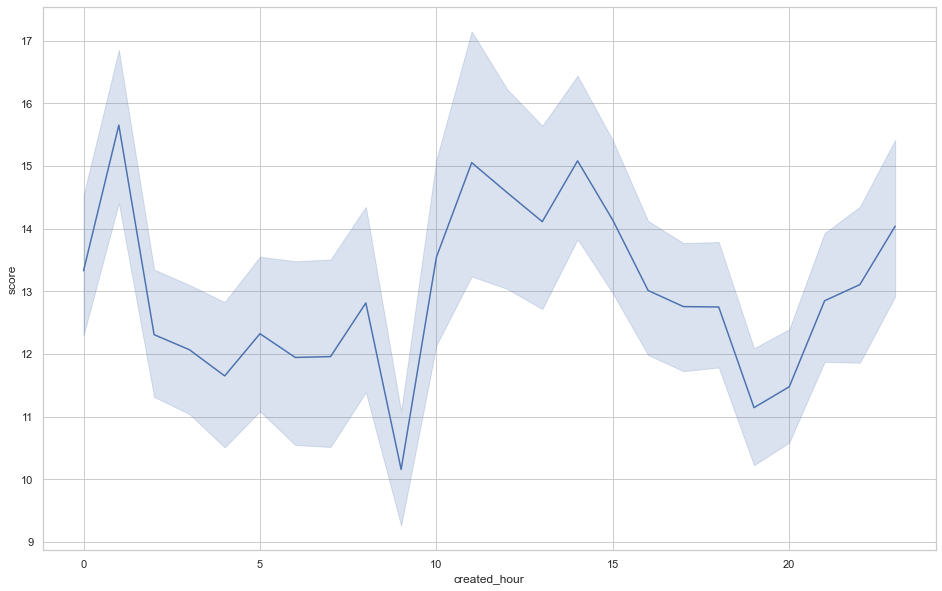

In [36]:
fig = plt.figure(figsize=(16,10))
sns.lineplot(data=df, x="created_hour", y="score")

# Days vs Score on comments

<AxesSubplot:xlabel='created_day', ylabel='score'>

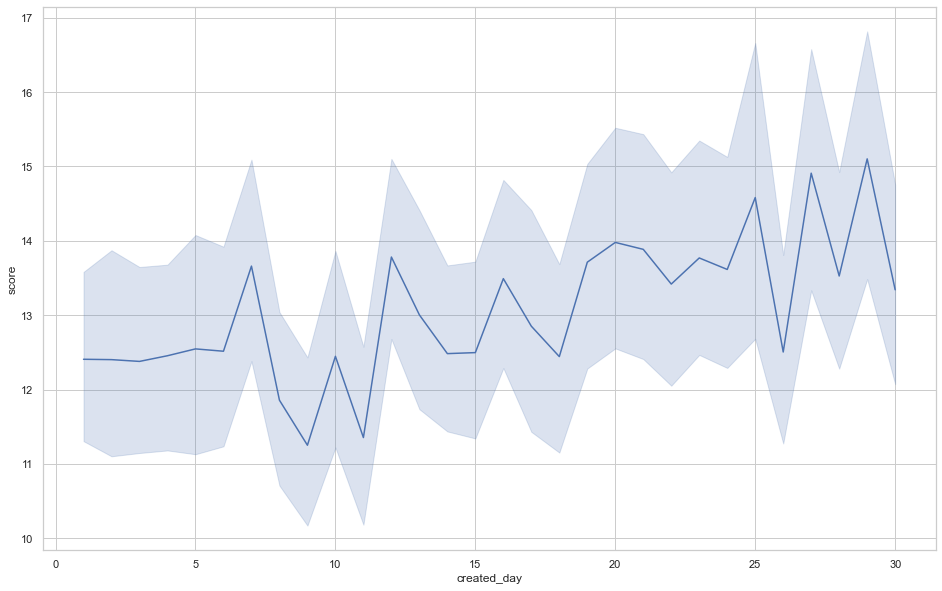

In [37]:
fig = plt.figure(figsize=(16,10))
sns.lineplot(data=df, x="created_day", y="score")

# Which author have the most scores

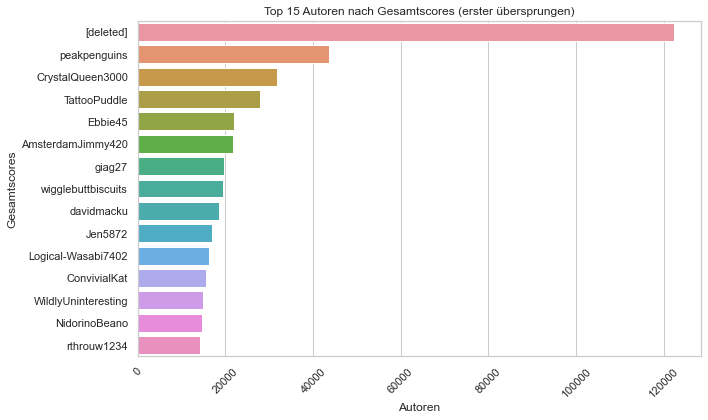

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: merged_df ist dein DataFrame mit den entsprechenden Spalten
# Stellen Sie sicher, dass Sie denselben DataFrame-Namen verwenden

# Autoren nach Gesamtscores gruppieren
author_scores = df.groupby('author')['score'].sum()

# Autoren nach Gesamtscores absteigend sortieren
sorted_authors = author_scores.sort_values(ascending=False)

# Den ersten Autor aus der sortierten Liste entfernen
sorted_authors = sorted_authors.iloc[:15]

# Die Top 15 Autoren auswählen
top_authors = sorted_authors.head(15)

# Plot mit Seaborn erstellen
plt.figure(figsize=(10, 6))
sns.barplot(y=top_authors.index, x=top_authors.values)
plt.title('Top 15 Autoren nach Gesamtscores (erster übersprungen)')
plt.xlabel('Autoren')
plt.ylabel('Gesamtscores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

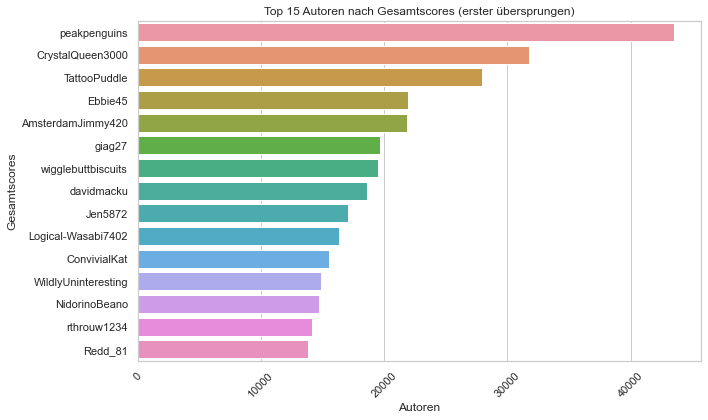

In [39]:

# Autoren nach Gesamtscores gruppieren
author_scores = df.groupby('author')['score'].sum()

# Autoren nach Gesamtscores absteigend sortieren
sorted_authors = author_scores.sort_values(ascending=False)

# Den Autor "[deleted]" aus der sortierten Liste entfernen
sorted_authors = sorted_authors[sorted_authors.index != "[deleted]"]

# Die Top 15 Autoren auswählen
top_authors = sorted_authors.head(15)

# Plot mit Seaborn erstellen
plt.figure(figsize=(10, 6))
sns.barplot(y=top_authors.index, x=top_authors.values)
plt.title('Top 15 Autoren nach Gesamtscores (erster übersprungen)')
plt.xlabel('Autoren')
plt.ylabel('Gesamtscores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [40]:
df.describe()

,gilded,score,created_hour,created_day,created_year,comment_len
count,566008.000000,566008.000000,566008.000000,566008.000000,566008.0,566008.000000
mean,0.000279,13.031492,12.433294,14.959547,2022.0,56.898429
std,0.018028,95.355541,7.232563,8.682876,0.0,67.264411
min,0.000000,-1596.000000,0.000000,1.000000,2022.0,1.000000
25%,0.000000,1.000000,6.000000,8.000000,2022.0,17.000000
50%,0.000000,2.000000,14.000000,14.000000,2022.0,36.000000
75%,0.000000,4.000000,19.000000,22.000000,2022.0,73.000000
max,3.000000,7781.000000,23.000000,30.000000,2022.0,1906.000000


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 566008 entries, 0 to 566392
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   author             566008 non-null  object
 1   author_flair_text  566008 non-null  object
 2   body               566008 non-null  object
 3   controversiality   566008 non-null  bool  
 4   created_utc        566008 non-null  object
 5   distinguished      566008 non-null  object
 6   edited             566008 non-null  bool  
 7   gilded             566008 non-null  int64 
 8   id                 566008 non-null  object
 9   link_id            566008 non-null  object
 10  parent_id          566008 non-null  object
 11  score              566008 non-null  int64 
 12  stickied           566008 non-null  bool  
 13  created_hour       566008 non-null  int64 
 14  created_day        566008 non-null  int64 
 15  created_year       566008 non-null  int64 
 16  clean_text         5

# Saved cleaned general data

In [104]:
df_body = df.drop(columns=['body'])

In [105]:
# CSV-Datei ohne Leerzeilen speichern
df_body.to_csv("relationship_advise_22_comments_EDA_clean.csv", sep=";",index=False)

# DataFrame lesen
df_new = pd.read_csv("relationship_advise_22_comments_EDA_clean.csv", sep=";")
df_new.info()

/Users/anthonyfernando/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566008 entries, 0 to 566007
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   author             566008 non-null  object
 1   author_flair_text  566008 non-null  object
 2   controversiality   566008 non-null  bool  
 3   created_utc        566008 non-null  object
 4   distinguished      566008 non-null  object
 5   edited             566008 non-null  bool  
 6   gilded             566008 non-null  int64 
 7   id                 566008 non-null  object
 8   link_id            566008 non-null  object
 9   parent_id          566008 non-null  object
 10  score              566008 non-null  int64 
 11  stickied           566008 non-null  bool  
 12  created_hour       566008 non-null  int64 
 13  created_day        566008 non-null  int64 
 14  created_year       566008 non-null  int64 
 15  clean_text         566008 non-null  object
 16  comment_len        5

# CSV-Datei ohne Leerzeilen speichern
df.to_csv("relationship_advise_22_comments_EDA_clean.csv", sep=";",index=False)

# DataFrame lesen
df_new = pd.read_csv("relationship_advise_22_comments_EDA_clean.csv", sep=";")
df_new.info()

In [106]:
rows_with_nan = df_new[df_new.isna().any(axis=1)]
rows_with_nan

,author,author_flair_text,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year,clean_text,comment_len


In [109]:
df.iloc[139666]

author                                                   Virtual_Ball6
author_flair_text                                                    0
body                 I've been in a similar situation but it was dr...
controversiality                                                 False
created_utc                                        2022-11-08 00:09:46
distinguished                                                    False
edited                                                           False
gilded                                                               0
id                                                             ivhfv32
link_id                                                      t3_yotexx
parent_id                                                    t3_yotexx
score                                                                1
stickied                                                         False
created_hour                                                         0
create

In [110]:
df_new.head()

,author,author_flair_text,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year,clean_text,comment_len
0,eebieteebie,0,False,2022-11-01 00:00:12,False,False,0,iukc3bp,t3_yisjyh,t3_yisjyh,2,False,0,1,2022,One of my exs was the same . I knew he was smo...,106
1,BisquickNinja,0,False,2022-11-01 00:00:15,False,False,0,iukc3kp,t3_yim2ky,t3_yim2ky,2,False,0,1,2022,Children are not their parents keeper or thera...,83
2,eyecicey,0,False,2022-11-01 00:00:24,False,False,0,iukc47z,t3_yisr17,t3_yisr17,1,False,0,1,2022,If a relationship is supposed to work you have...,88
3,AutisticMuffin97,0,False,2022-11-01 00:00:25,False,False,0,iukc4ai,t3_yihovt,t3_yihovt,1,False,0,1,2022,Ew ew ew ew he s a pedo ew ew ew ew ew dump hi...,18
4,SnooFoxes4362,0,False,2022-11-01 00:00:29,False,False,0,iukc4kk,t3_yiiuen,t3_yiiuen,6,False,0,1,2022,It only works if you tell them instantly . Oth...,77


In [114]:
import csv

In [116]:
df.to_csv("test.csv",index=False,sep=";",quoting=csv.QUOTE_ALL)

In [117]:
test_new=pd.read_csv("test.csv",sep=";",quoting=csv.QUOTE_ALL)
test_new.info()

/Users/anthonyfernando/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566008 entries, 0 to 566007
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   author             566008 non-null  object
 1   author_flair_text  566008 non-null  object
 2   body               566008 non-null  object
 3   controversiality   566008 non-null  bool  
 4   created_utc        566008 non-null  object
 5   distinguished      566008 non-null  object
 6   edited             566008 non-null  bool  
 7   gilded             566008 non-null  int64 
 8   id                 566008 non-null  object
 9   link_id            566008 non-null  object
 10  parent_id          566008 non-null  object
 11  score              566008 non-null  int64 
 12  stickied           566008 non-null  bool  
 13  created_hour       566008 non-null  int64 
 14  created_day        566008 non-null  int64 
 15  created_year       566008 non-null  int64 
 16  clean_text         5

In [111]:
import pandas as pd
#df_new=pd.read_csv("relationship_advise_22_comments_EDA_clean.csv",sep=";")
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566008 entries, 0 to 566007
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   author             566008 non-null  object
 1   author_flair_text  566008 non-null  object
 2   controversiality   566008 non-null  bool  
 3   created_utc        566008 non-null  object
 4   distinguished      566008 non-null  object
 5   edited             566008 non-null  bool  
 6   gilded             566008 non-null  int64 
 7   id                 566008 non-null  object
 8   link_id            566008 non-null  object
 9   parent_id          566008 non-null  object
 10  score              566008 non-null  int64 
 11  stickied           566008 non-null  bool  
 12  created_hour       566008 non-null  int64 
 13  created_day        566008 non-null  int64 
 14  created_year       566008 non-null  int64 
 15  clean_text         566008 non-null  object
 16  comment_len        5

In [112]:
 df_new[df_new.isna().any(axis=1)]

,author,author_flair_text,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year,clean_text,comment_len


False    566008
Name: stickied, dtype: int64


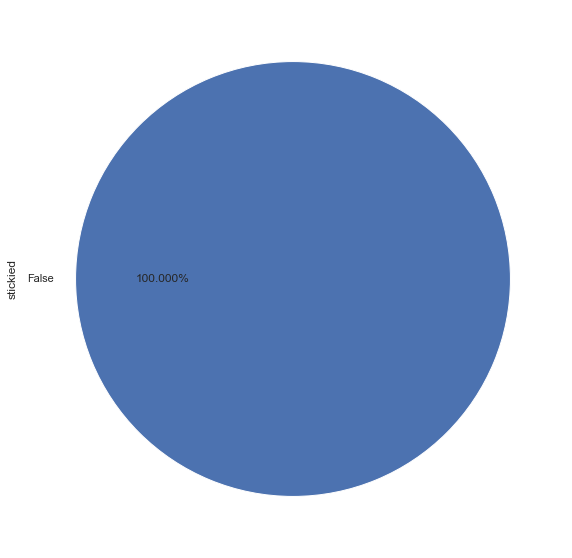

In [113]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df_new["stickied"].value_counts().plot(kind='pie', autopct='%1.3f%%')
print(df_new["stickied"].value_counts())